# Import Python Libraries

In [79]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime
from scipy.stats import trim_mean

# Reading Dataset

In [34]:
# Import Data 'Cars'
cars = pd.read_csv('used_cars_data.csv')
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# Data Information about Features Data Types

In [35]:
# Let's check DataType of our DataFrame
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


# Features Reduction

In [36]:
# Remove unuseful columns or data to analysis
cars = cars.drop(columns = ['S.No.'])

# Check for Duplication & Null Values with Treatment

In [37]:
# Check for dupliacated values
if cars.duplicated().any().any():
    print('The Dataset contains Duplicated Records')
    cars = cars.drop_duplicates()
    print('The Duplicated Records are Removed')
else:
    print('No Duplicated Records')
# Check for Null Values
if cars.isnull().sum().sum()!=0:
    print('The dataset contains Null Values')
    cars = cars.dropna()
    print('Dataset is clean')
else:
    print('The Dataset doesnt contain Null Values')

The Dataset contains Duplicated Records
The Duplicated Records are Removed
The dataset contains Null Values
Dataset is clean


# Features Engineering : Change data type to convinient type and format

In [38]:
# Change the columns type to convinient type
cars['Name'] = cars['Name'].astype(str)

In [39]:
# Unify some Column Values Units
milage = pd.DataFrame()
cars['Mileage'] = cars['Mileage'].astype(str)
for value in cars['Mileage']:
    if value[len(value)-2:]=='pl':
        numbers = re.findall(r"[-+]?\d*\.\d+|\d+", value[:len(value)-2])
        number = float(numbers[0]) if numbers else None
        milage = milage._append({'Milage km/kg':number*0.75},ignore_index=True)
# Remove the Column Because we have the new One
cars = cars.drop(columns=['Mileage'])
# Update our DataFrame
cars['Mileage Km/Kg'] = milage['Milage km/kg'].astype(float)

New_Price = pd.DataFrame()
cars['New_Price'] = cars['New_Price'].astype(str)
for value in cars['New_Price']:
    if value[len(value)-4:]=='Lakh':
        numbers = re.findall(r"[-+]?\d*\.\d+|\d+", value[:len(value)-4])
        number = float(numbers[0]) if numbers else None
        New_Price = New_Price._append({'New_Price Lakh':number},ignore_index=True)
# Remove the Column Because we have the new One
cars = cars.drop(columns=['New_Price'])
# Update our DataFrame
cars['New_Price Lakh'] = New_Price['New_Price Lakh'].astype(float)

In [40]:
# Preprocess Data
# Change Engine and Power to float with unit included in the column
engine=pd.DataFrame(columns=['Engine CC'])
cars['Engine'] = cars['Engine'].astype(str)
cars['Power'] = cars['Power'].astype(str)
for value in cars['Engine']:
    numbers = re.findall(r"[-+]?\d*\.\d+|\d+", value[:len(value)-2])
    nbr= float(numbers[0]) if numbers else None
    engine = engine._append({'Engine CC':(nbr)},ignore_index=True)
# Remove the Column Because we have the new One
cars = cars.drop(columns=['Engine'])
# Update our DataFrame
cars['Engine CC'] = engine['Engine CC'].astype(float)
power = pd.DataFrame()
for value in cars['Power']:
    nbr = (value[:len(value)-3])
    power = power._append({'Power':(nbr)},ignore_index=True)
# Update our DataFrame
cars['Power bhp'] = power['Power'].astype(float)
# Remove the Column Because we have the new One
cars = cars.drop(columns=['Power'])

In [41]:
# gasoil conversion multiply the km/l value by 0.75
# our conversion will be based on the last 2 charcters kg or pl
for column in cars.columns:
    if cars[column].dtype=='object':
        cars[column] = cars[column].astype('category')

In [42]:
# Verification
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 823 entries, 2 to 6014
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               823 non-null    category
 1   Location           823 non-null    category
 2   Year               823 non-null    int64   
 3   Kilometers_Driven  823 non-null    int64   
 4   Fuel_Type          823 non-null    category
 5   Transmission       823 non-null    category
 6   Owner_Type         823 non-null    category
 7   Seats              823 non-null    float64 
 8   Price              823 non-null    float64 
 9   Mileage Km/Kg      115 non-null    float64 
 10  New_Price Lakh     113 non-null    float64 
 11  Engine CC          115 non-null    float64 
 12  Power bhp          115 non-null    float64 
dtypes: category(5), float64(6), int64(2)
memory usage: 74.1 KB


In [43]:
# Visualize the Diffrence and the outcome of our preprocessing
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage Km/Kg,New_Price Lakh,Engine CC,Power bhp
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,16.1700,10.65,1462.0,103.25
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,8.0,17.50,18.2250,11.12,1248.0,88.50
10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,5.0,9.95,10.2600,19.34,2393.0,147.80
15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,7.0,15.00,14.8725,6.45,1198.0,67.00
20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,5.0,18.55,14.3625,9.51,1198.0,75.94


# Create Features

In [44]:
# Creating Feature: Car Age

# Get the current year
current_year = datetime.now().year
cars['Age'] = current_year - cars['Year']
# Create The 2 subFeatures Brand & Model from Name
cars['Brand'] = cars.Name.str.split().str.get(0)
cars['Model'] = cars.Name.str.split().str.get(1) + cars.Name.str.split().str.get(2)

In [45]:
# Check for Brand Values
cars.Brand.unique()

array(['Honda', 'Toyota', 'Maruti', 'Mitsubishi', 'BMW', 'Volkswagen',
       'Hyundai', 'Mercedes-Benz', 'Nissan', 'Tata', 'Datsun', 'Audi',
       'Mahindra', 'Skoda', 'Mini', 'Jaguar', 'Jeep', 'Ford', 'Renault',
       'Land', 'Volvo', 'Fiat', 'Isuzu', 'Porsche'], dtype=object)

In [46]:
# Change the Inccorect Values
cars["Brand"].replace({"Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)

In [47]:
# Check for the Outcome of our Operations
cars.Brand.unique()

array(['Honda', 'Toyota', 'Maruti', 'Mitsubishi', 'BMW', 'Volkswagen',
       'Hyundai', 'Mercedes-Benz', 'Nissan', 'Tata', 'Datsun', 'Audi',
       'Mahindra', 'Skoda', 'Mini Cooper', 'Jaguar', 'Jeep', 'Ford',
       'Renault', 'Land Rover', 'Volvo', 'Fiat', 'Isuzu', 'Porsche'],
      dtype=object)

# Statistical Moments : Location, Variability, Skewness, Kurtosis

In [48]:
# Group Features based on the type Numerical vs Categorical
cat_cols=cars.select_dtypes(include=['object','category']).columns
num_cols = cars.select_dtypes(include=np.number).columns.tolist()
Metrics = pd.DataFrame()
for column in num_cols:
    Metrics = Metrics._append({
        'Feature':column,
        'Mean':cars[column].mean(),
        'Median':cars[column].median(),
        'Range':cars[column].max() - cars[column].min(),
        'IQR':cars[column].quantile(q=0.75) - cars[column].quantile(q=0.25),
        'STD':cars[column].std(),
        'Variance':cars[column].var(),
        'Skewness [-1,1]':round(cars[column].skew(),2),
        'Kurtosis[-2,2]':round(cars[column].kurtosis(),2)
    },ignore_index=True)

In [49]:
Metrics.head(7)

,Feature,Mean,Median,Range,IQR,STD,Variance,"Skewness [-1,1]","Kurtosis[-2,2]"
0,Year,2015.869988,2016.000,18.00,2.0000,2.378709,5.658259e+00,-1.43,3.23
1,Kilometers_Driven,40498.402187,34895.000,214400.00,33341.5000,28791.171759,8.289316e+08,1.52,3.76
2,Seats,5.304982,5.000,6.00,0.0000,0.795707,6.331503e-01,1.52,2.24
3,Price,13.647606,8.200,159.30,12.5000,14.860539,2.208356e+02,3.12,15.85
4,Mileage Km/Kg,14.927609,15.285,12.78,3.8775,3.016578,9.099745e+00,-0.09,-0.56
5,New_Price Lakh,18.621504,11.520,82.68,14.6900,16.567395,2.744786e+02,1.88,3.32
6,Engine CC,1594.147826,1461.000,2194.00,771.5000,596.497985,3.558098e+05,1.05,0.17


Skewness Analysis

In [50]:
# Based on the Value of Skewness but we can visualize the effect in the plots
for col in num_cols:
    if Metrics['Skewness [-1,1]'].loc[num_cols.index(col)] <-1:
        print(f'The Feature {col} is left skewed')
    elif Metrics['Skewness [-1,1]'].loc[num_cols.index(col)] >1:
        print(f'The Feature {col} is left skewed')

The Feature Year is left skewed
The Feature Kilometers_Driven is left skewed
The Feature Seats is left skewed
The Feature Price is left skewed
The Feature New_Price Lakh is left skewed
The Feature Engine CC is left skewed
The Feature Power bhp is left skewed
The Feature Age is left skewed


# EDA Univariate Analysis Numerical & Categorical Features

# Numerical Features

We will use the Boxplot to see outliers based on the 1.5*IQR and the histogram kde option to see the data distribution and Skewness effect on each NUmerical Feature

Year


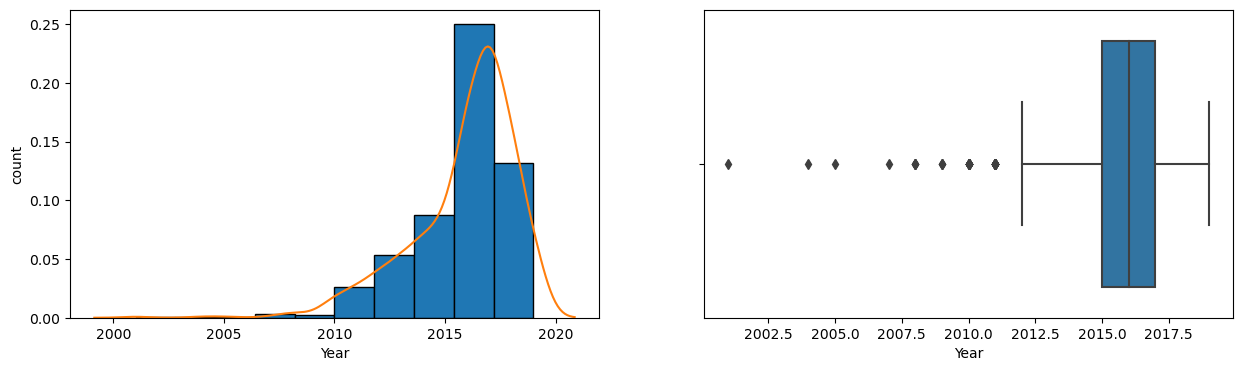

Kilometers_Driven


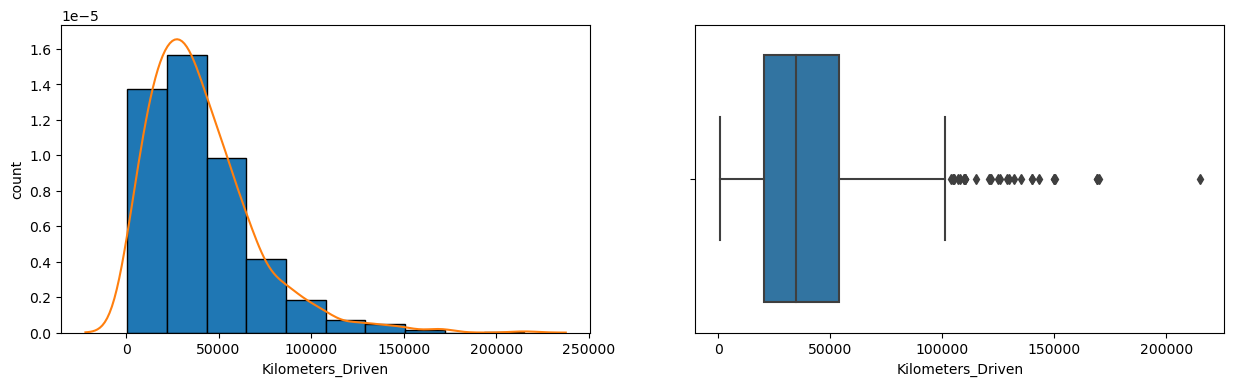

Seats


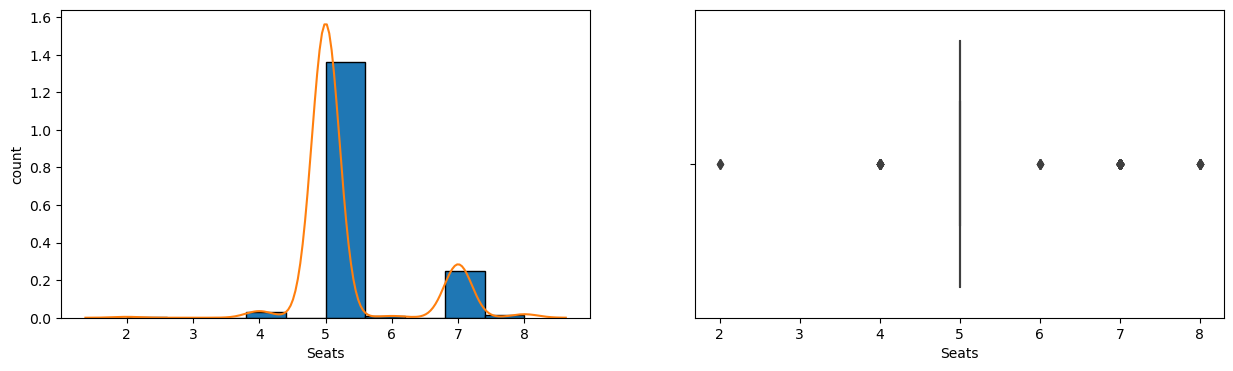

Price


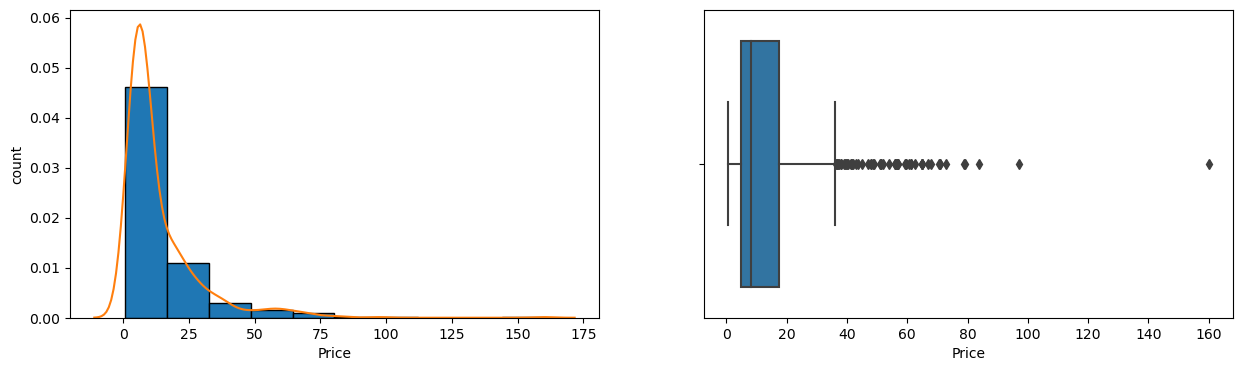

Mileage Km/Kg


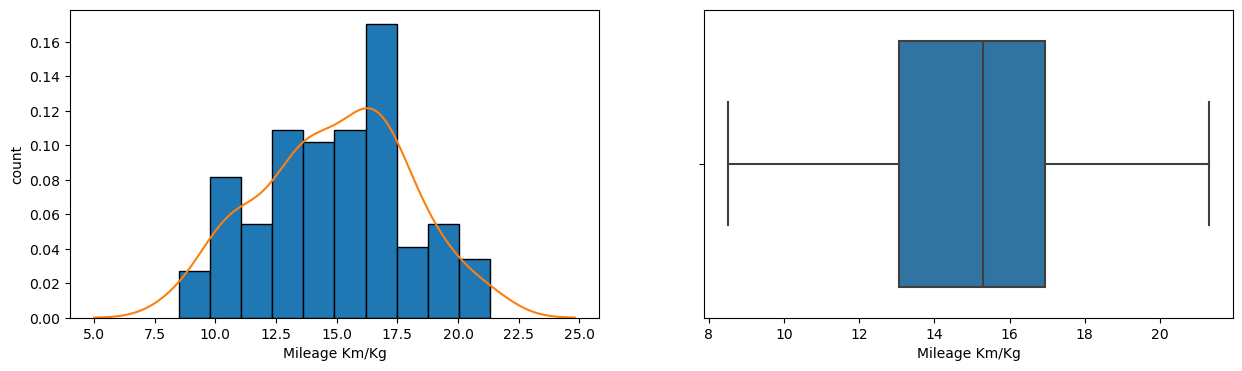

New_Price Lakh


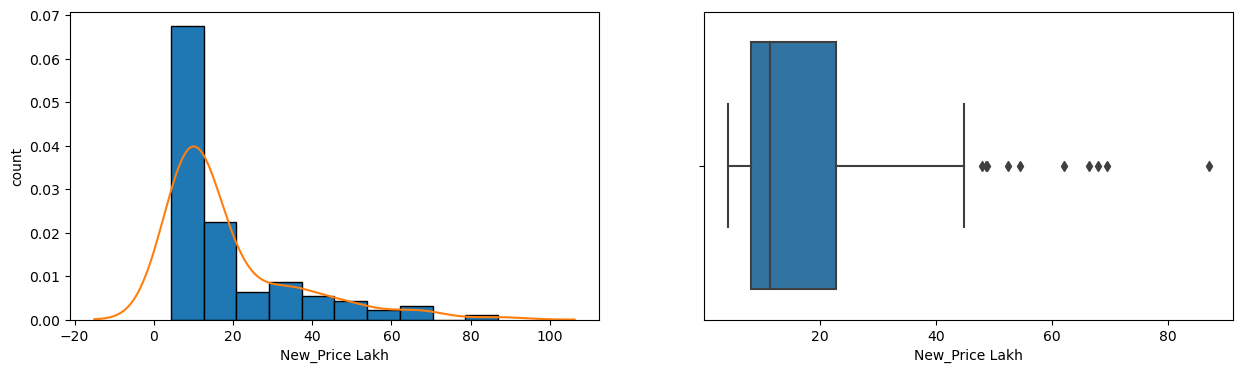

Engine CC


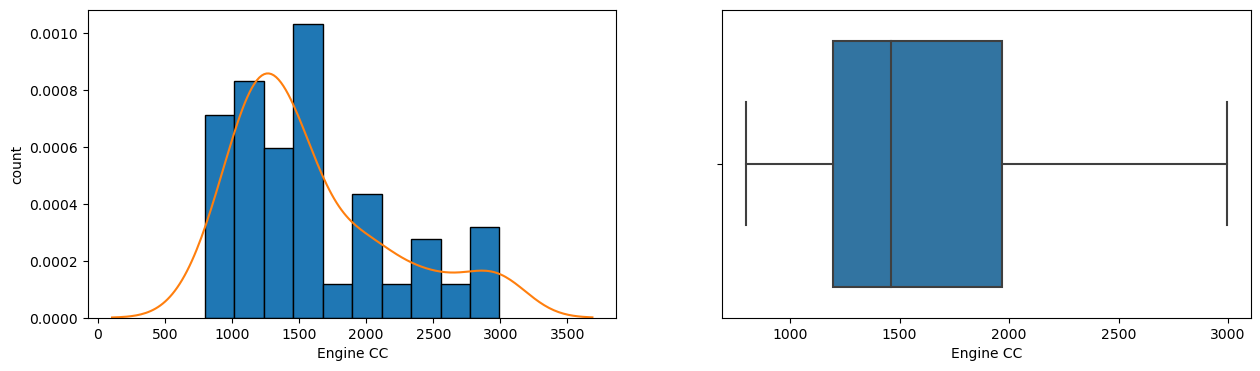

Power bhp


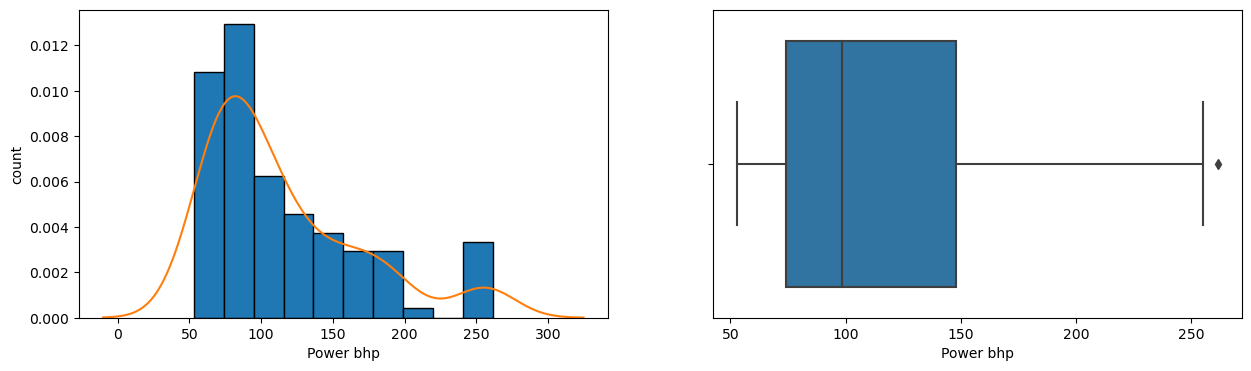

Age


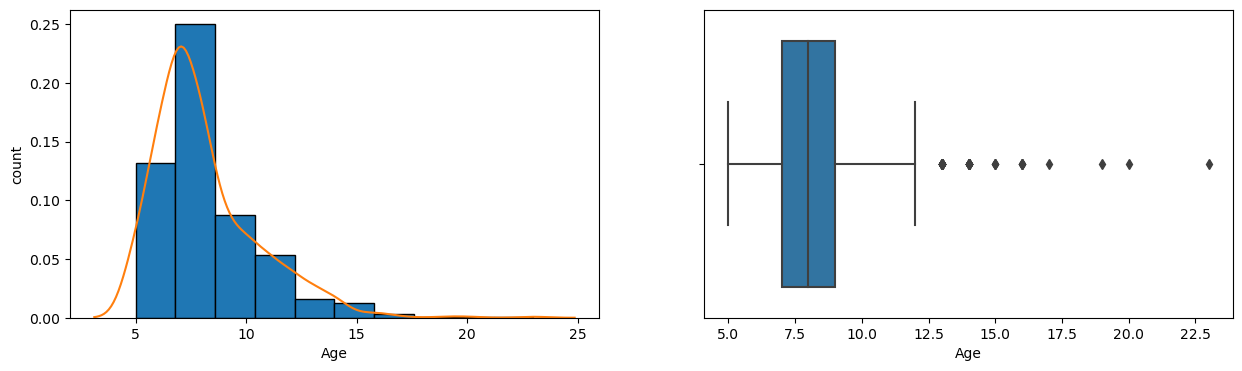

In [51]:
# let's visualize the Numerical Features
for col in num_cols:
    print(col)
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    cars[col].hist(grid=False,edgecolor='black',density=True)
    sns.kdeplot(cars[col])
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=cars[col])
    plt.show()

As you can many features are skewed left(Exple Year) or right(Exple Age and Kilometers_Driven), So we need to make the skewness effect less as possible.

# Categorical Features

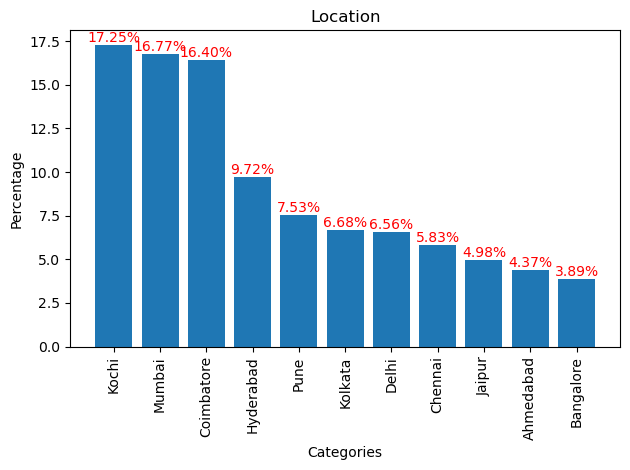

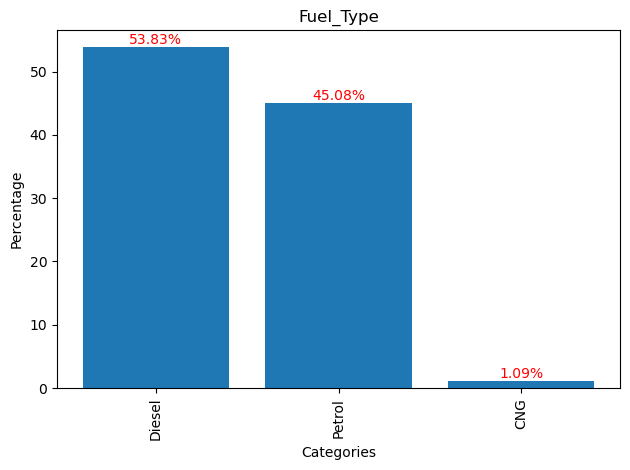

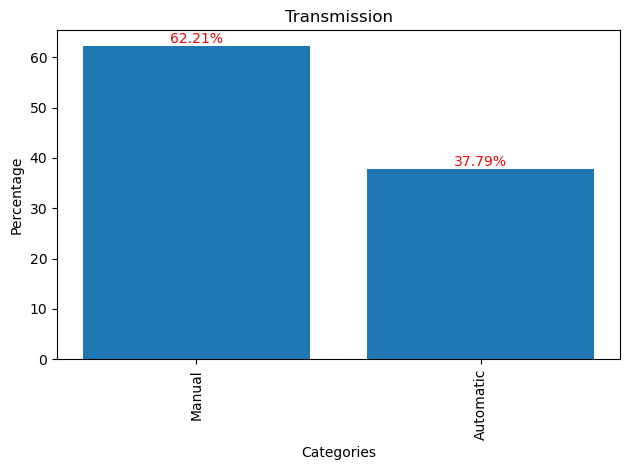

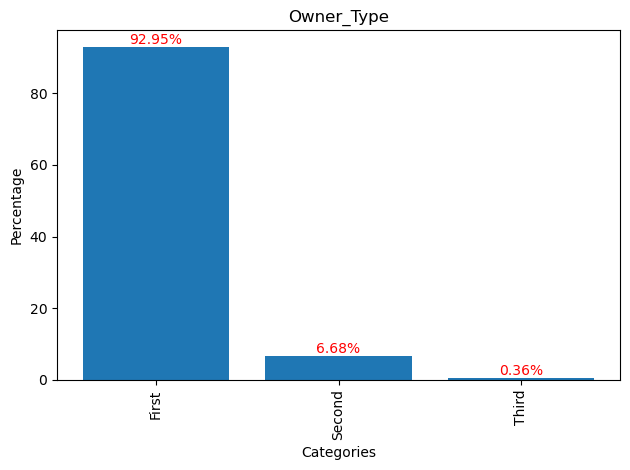

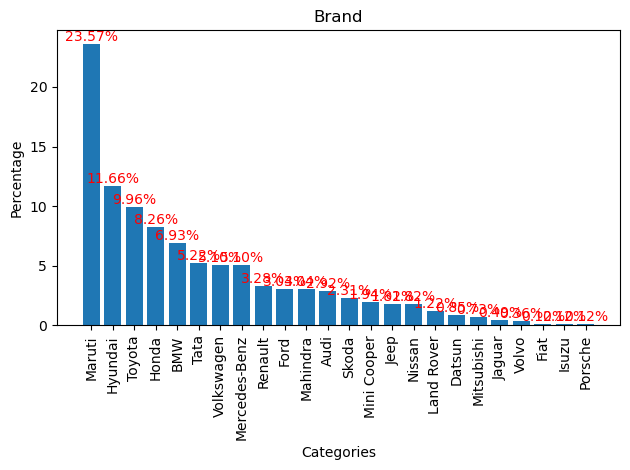

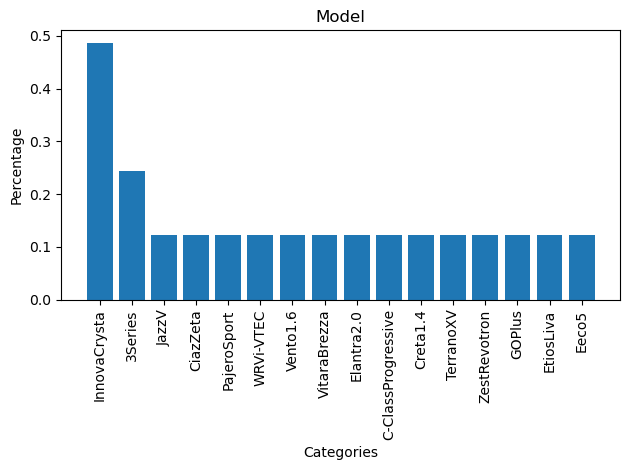

In [65]:
# Iterate over each categorical column
for col in cat_cols:
    if col != 'Name':
        # Calculate the percentage values for each category
        percentages = (cars[col].value_counts() / len(cars[col])) * 100
        
        # Create a new figure
        plt.figure()
        
        if col == 'Model':
            # Plot the bar plot for the current column (showing only the top 20 categories)
            percentages2 = ((cars[col].head(20)).value_counts() / len(cars[col])) * 100
            plt.bar((cars[col].head(20)).value_counts().index, height=percentages2)
        else:
            # Plot the bar plot for the current column
            bars = plt.bar(percentages.index, height=percentages)
            # Annotate each bar with its percentage value
            for bar, percent in zip(bars, percentages):
                plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percent:.2f}%', 
                         ha='center', va='bottom', color='red')
        
        plt.title(col)  # Set the title to the column name
        plt.xlabel('Categories')  # Set the x-label
        plt.ylabel('Percentage')   # Set the y-label to Percentage
        plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
        plt.tight_layout()  # Adjust layout to prevent overlap
        plt.show()  # Show the plot

# As you can see:

1. Kochi has the highest number of cars available for purchase, followed by Mumbai with 17.25% and 16.77%.
2. Available cars' dominant fuel type is Diesel at 53.83%.
3. 62.21% of cars have manual transmission.
4. 92.95% of cars are first-owner cars. This shows most buyers prefer to purchase first-owner cars.
5. 23.57% of cars belong to the brand Maruti, followed by 11.66% of cars belonging to Hyundai.
6. InnovaCrysta and WagonR rank first among all models which are available for purchase.

Data Transformation:
After skewness Analysis, we should make some data transformation using the log transformation to reduce the skewness.

In [69]:
# Log transformation can help in normalization, so this variable can maintain standard scale with other variables
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    return 'Log Transform is done with Success'

In [70]:
skewnessFeatures = Metrics[(Metrics['Skewness [-1,1]'] > 1.07) | (Metrics['Skewness [-1,1]'] < -1.07)]['Feature']
# Let's get the Skewness Features
skewnessFeatures = Metrics[(Metrics['Skewness [-1,1]'] > 1.07) | (Metrics['Skewness [-1,1]'] < -1.07)]['Feature']
# Let's Apply Log Transformation
log_transform(cars,skewnessFeatures)

'Log Transform is done with Success'

# Let's Visualize Kilometers_Driven vs Kilometers_Driven_Log

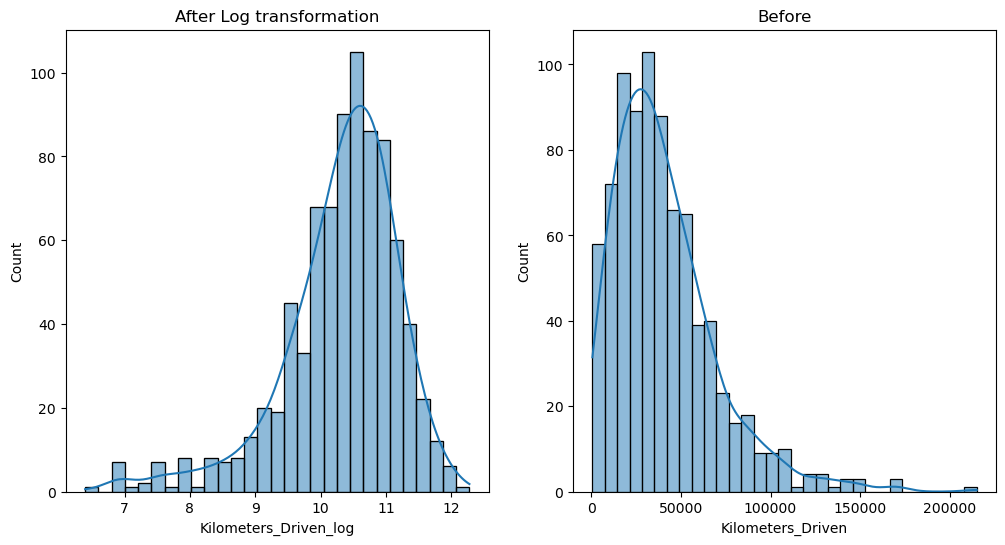

As you can we manage to reduce the Skewness Effect Before 1.5236015576069308 and After -1.255976712413771 Where range is [-1,1]


In [74]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the distribution after log transformation
sns.histplot(cars["Kilometers_Driven_log"], ax=axes[0], kde=True)
axes[0].set_title('After Log transformation')
axes[0].set_xlabel('Kilometers_Driven_log')

# Plot the distribution before log transformation
sns.histplot(cars["Kilometers_Driven"], ax=axes[1], kde=True)
axes[1].set_title('Before')
axes[1].set_xlabel('Kilometers_Driven')

# # Adjust layout
# plt.tight_layout()

# Show the plot
plt.show()

print(f'As you can we manage to reduce the Skewness Effect Before {cars["Kilometers_Driven"].skew()} and After {cars["Kilometers_Driven_log"].skew()}','Where range is [-1,1]')

# EDA Bivariate Analysis

C:\Users\benmh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


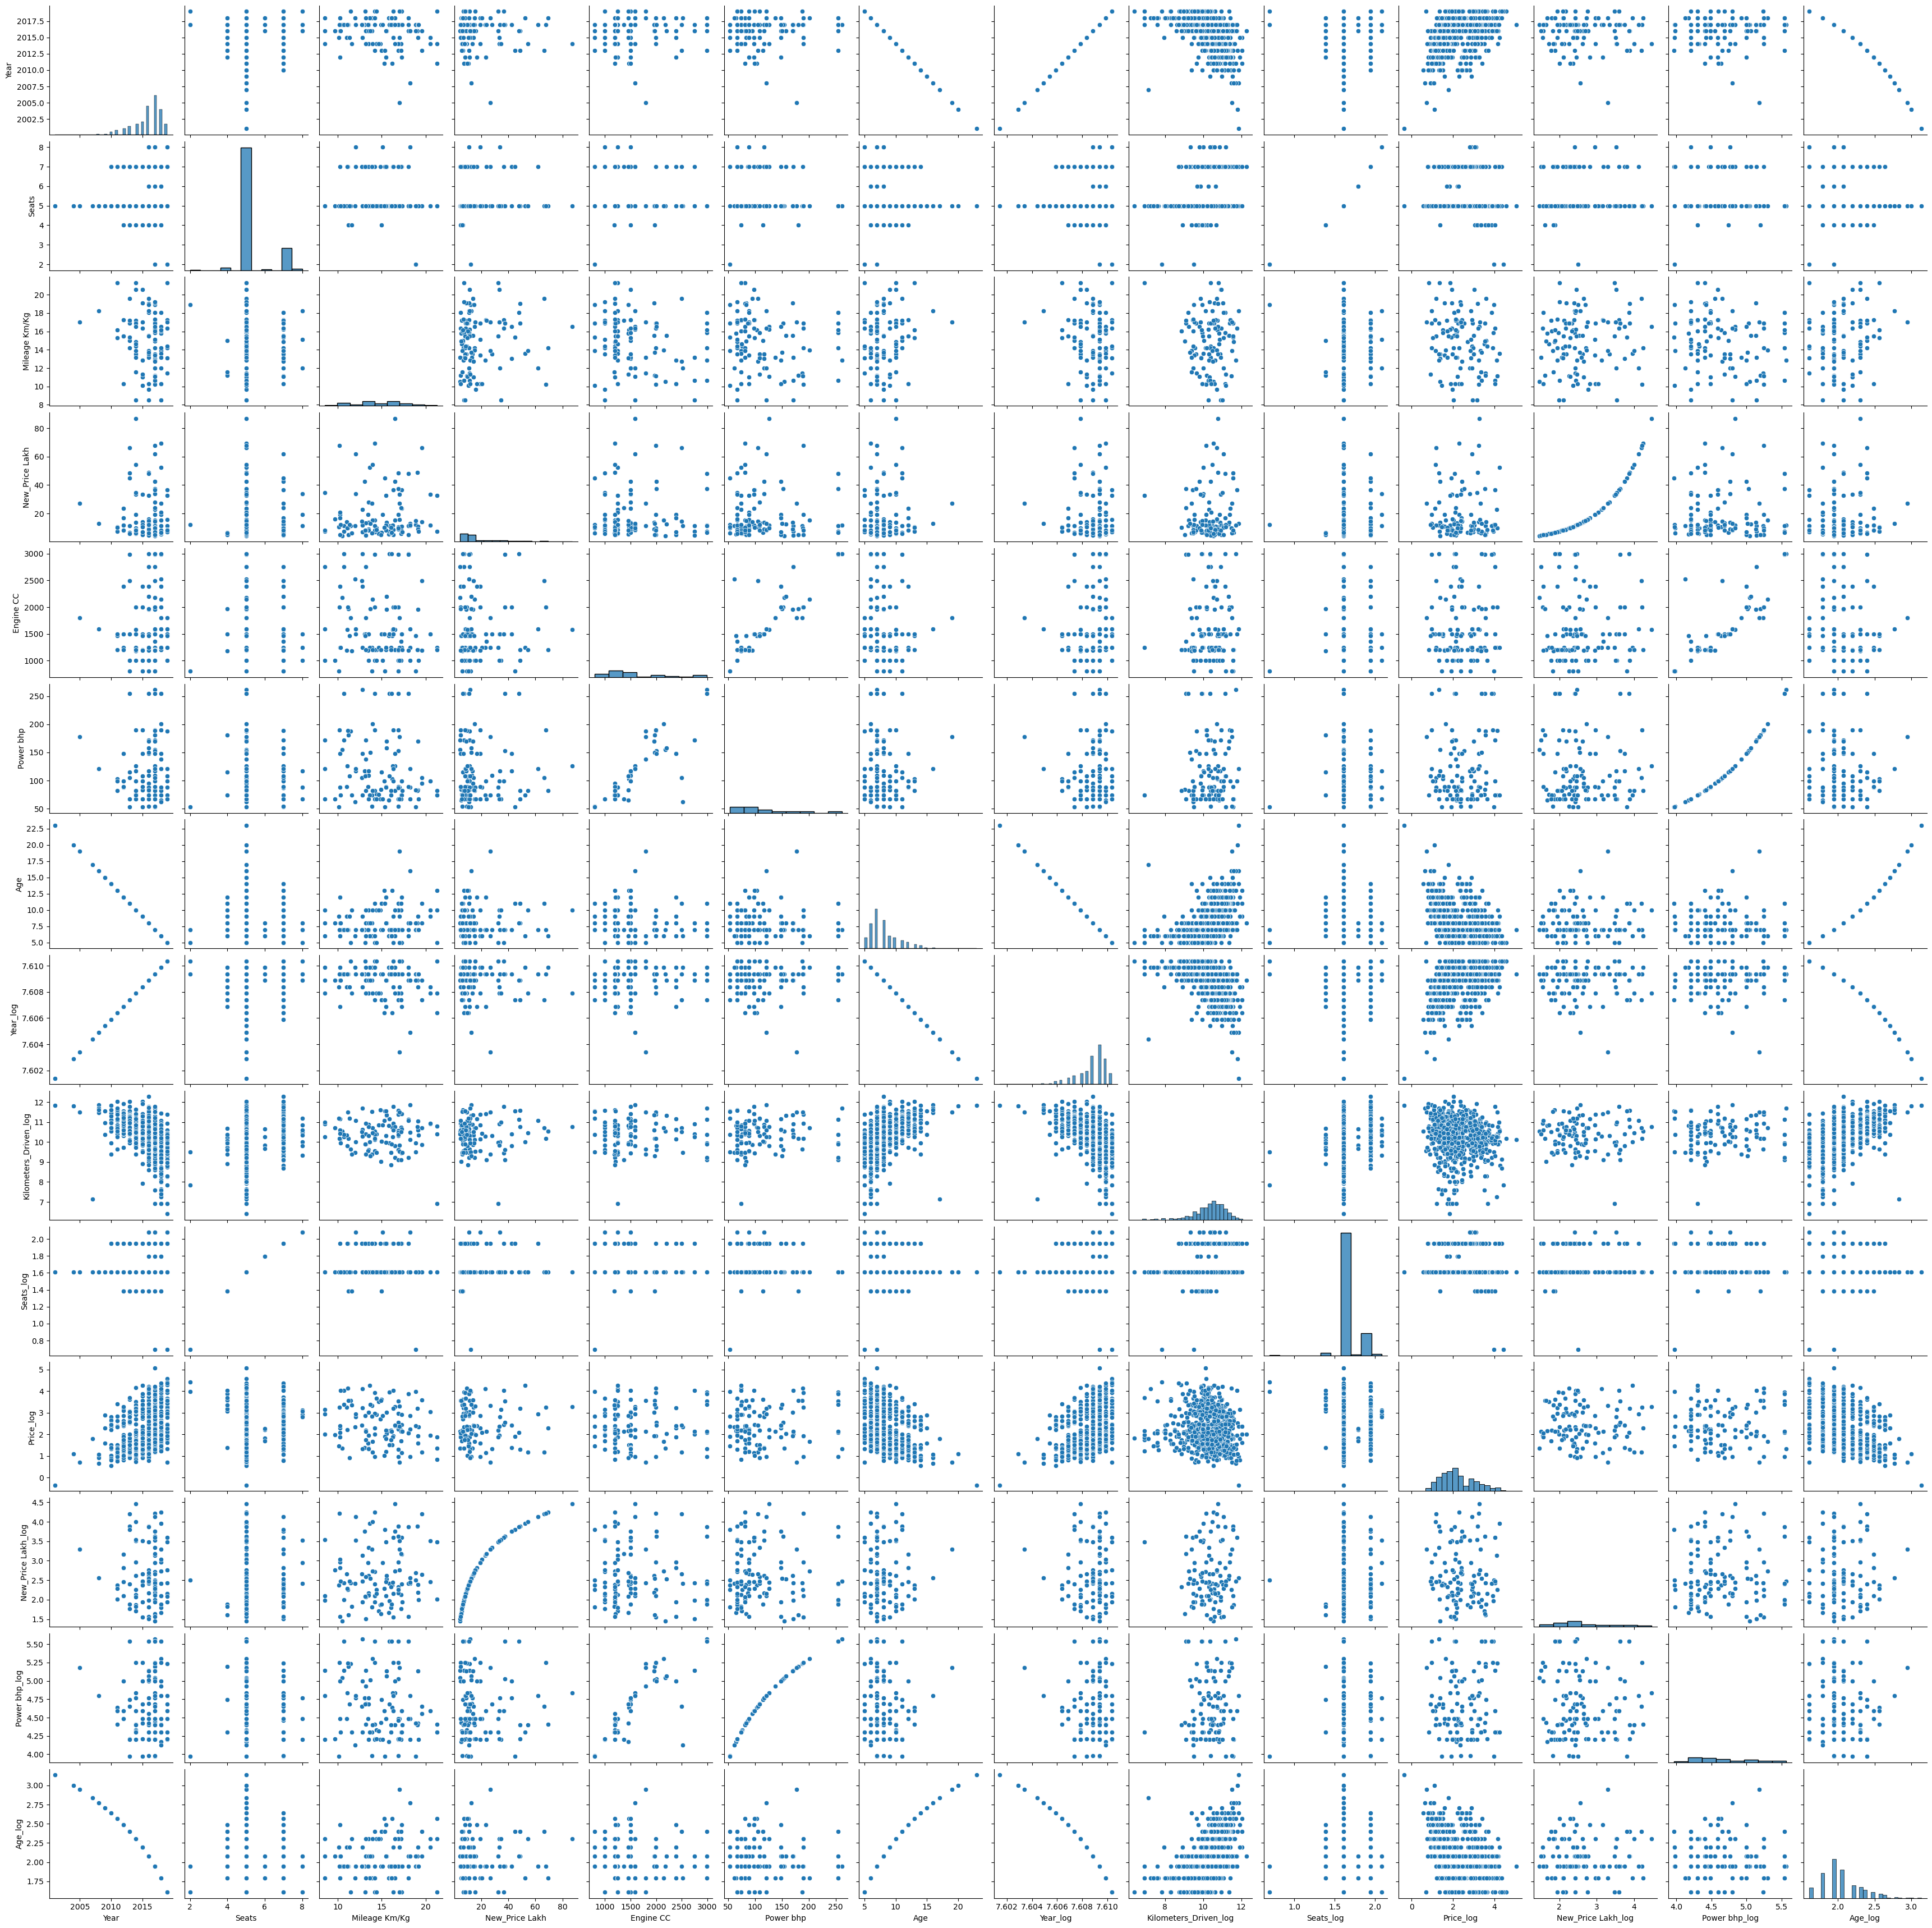

In [76]:
sns.pairplot(data=cars.drop(['Kilometers_Driven','Price'],axis=1))
plt.show()

# Let's analyse something else which is the Price with the Model

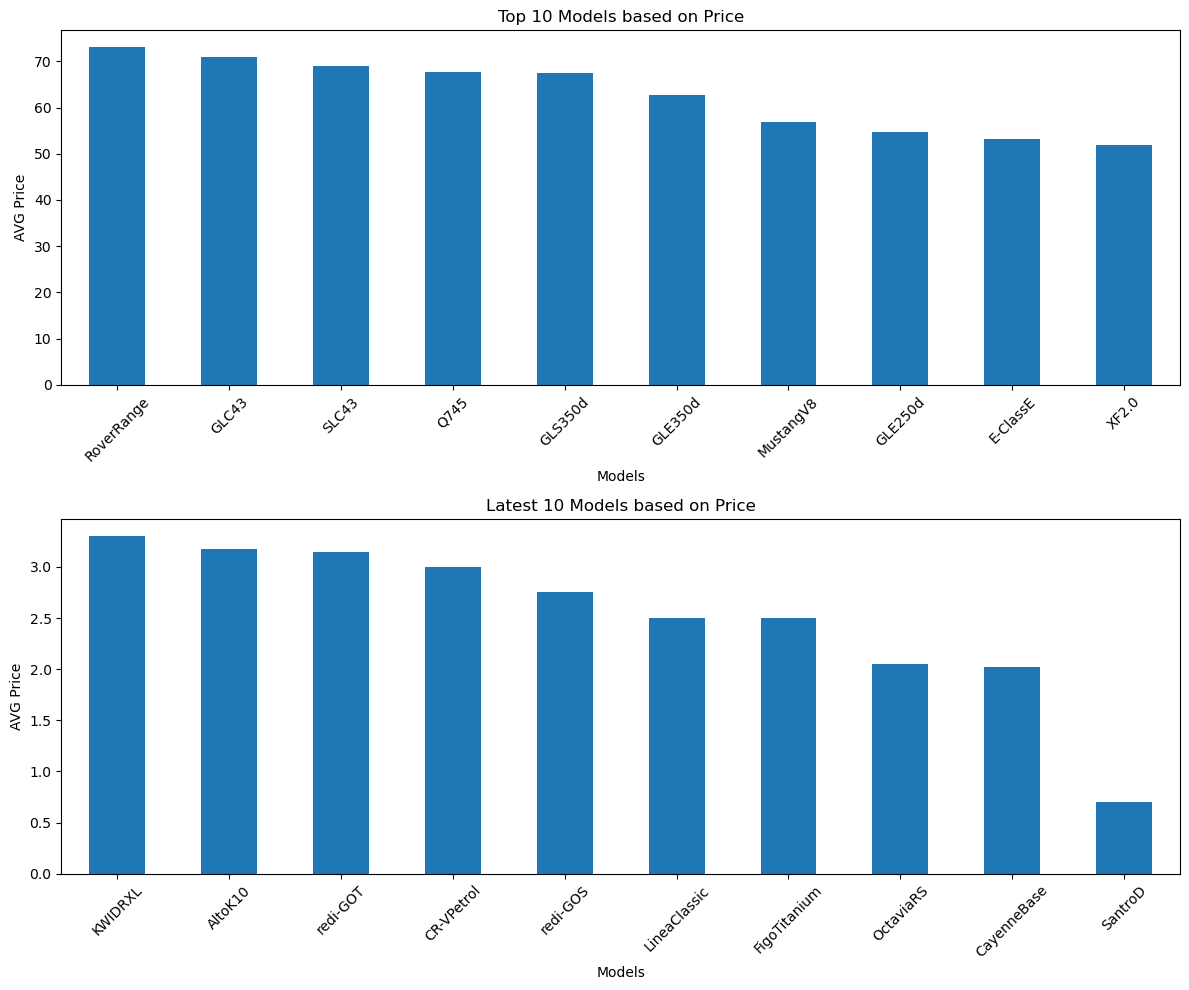

In [84]:
# Calculate the trimmed mean for each model, trimming 20% from each end of the data to remove outliers effect
# While we can work with median, we prefer the average
model_grp = cars.groupby('Model')['Price'].apply(lambda x: trim_mean(x, 0.2)).sort_values(ascending=False).reset_index()

# Use the top 10 models
top_10_models = model_grp.head(10)

# Use the latest 10 models
latest_10_models = model_grp.tail(10)

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot the top 10 models
top_10_models.plot(x='Model', y='Price', kind='bar', ax=axs[0], legend=False)
axs[0].set_title('Top 10 Models based on Price')
axs[0].set_xlabel('Models')
axs[0].set_ylabel('AVG Price')
axs[0].tick_params(axis='x', rotation=45)

# Plot the latest 10 models
latest_10_models.plot(x='Model', y='Price', kind='bar', ax=axs[1], legend=False)
axs[1].set_title('Latest 10 Models based on Price')
axs[1].set_xlabel('Models')
axs[1].set_ylabel('AVG Price')
axs[1].tick_params(axis='x', rotation=45)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

# As you can see:
1. Expensive Model is RoverRange
2. Cheap Model is SantroD
3. So, let's analyse the brand and price

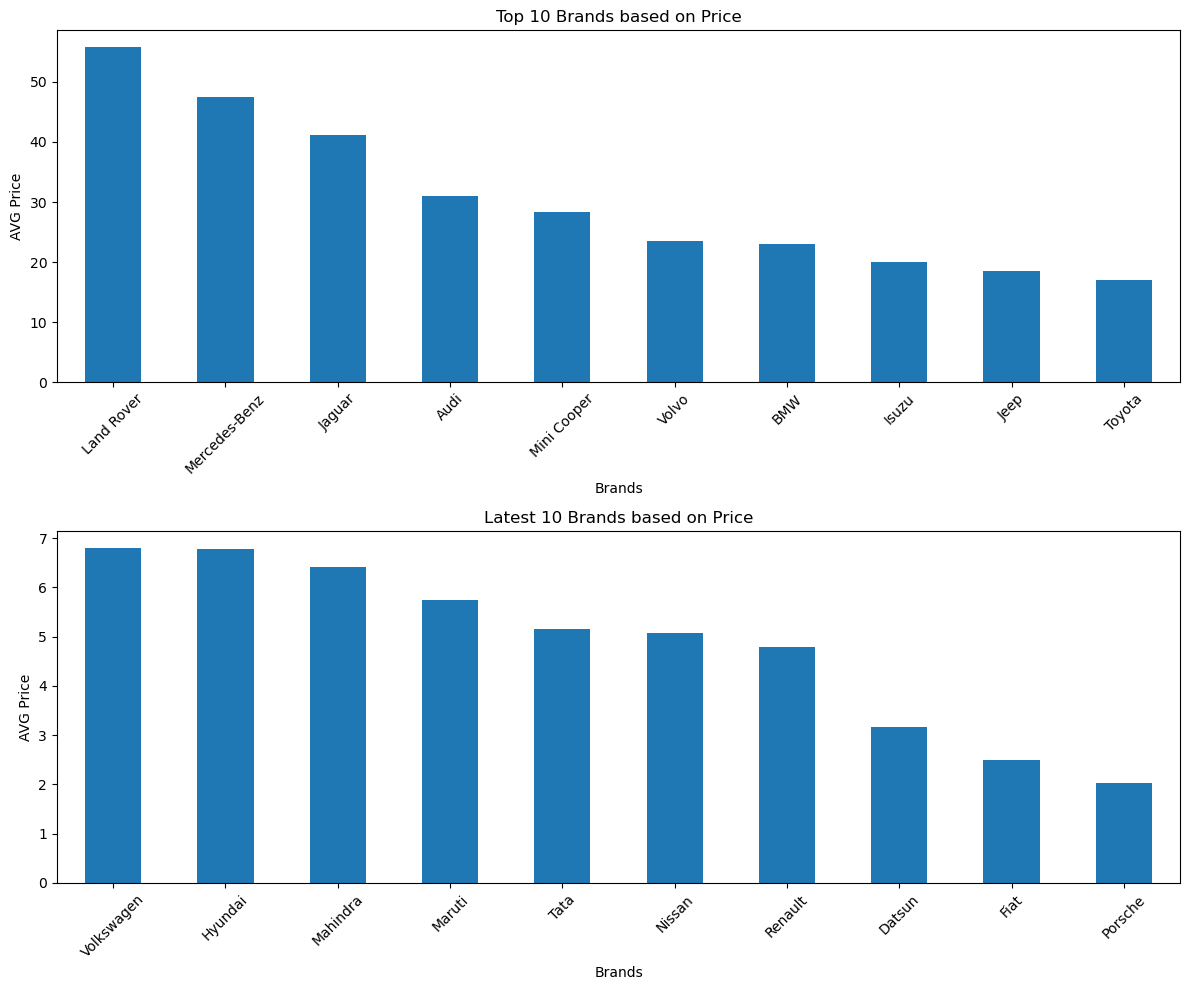

In [86]:
# Calculate the trimmed mean for each model, trimming 20% from each end of the data to remove outliers effect
# While we can work with median, we prefer the average
brand_grp = cars.groupby('Brand')['Price'].apply(lambda x: trim_mean(x, 0.2)).sort_values(ascending=False).reset_index()

# Use the top 10 models
top_10_brands = brand_grp.head(10)

# Use the latest 10 models
latest_10_brands = brand_grp.tail(10)

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot the top 10 models
top_10_brands.plot(x='Brand', y='Price', kind='bar', ax=axs[0], legend=False)
axs[0].set_title('Top 10 Brands based on Price')
axs[0].set_xlabel('Brands')
axs[0].set_ylabel('AVG Price')
axs[0].tick_params(axis='x', rotation=45)

# Plot the latest 10 models
latest_10_brands.plot(x='Brand', y='Price', kind='bar', ax=axs[1], legend=False)
axs[1].set_title('Latest 10 Brands based on Price')
axs[1].set_xlabel('Brands')
axs[1].set_ylabel('AVG Price')
axs[1].tick_params(axis='x', rotation=45)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

# As you can see:
1. Expensive Brand is Land Rover whici is included in Rover Raange Model.
2. Cheap Brand is Porsche, bec we have just one porsche record.

# Analyze the variance of car prices based on the number of years they have been used.

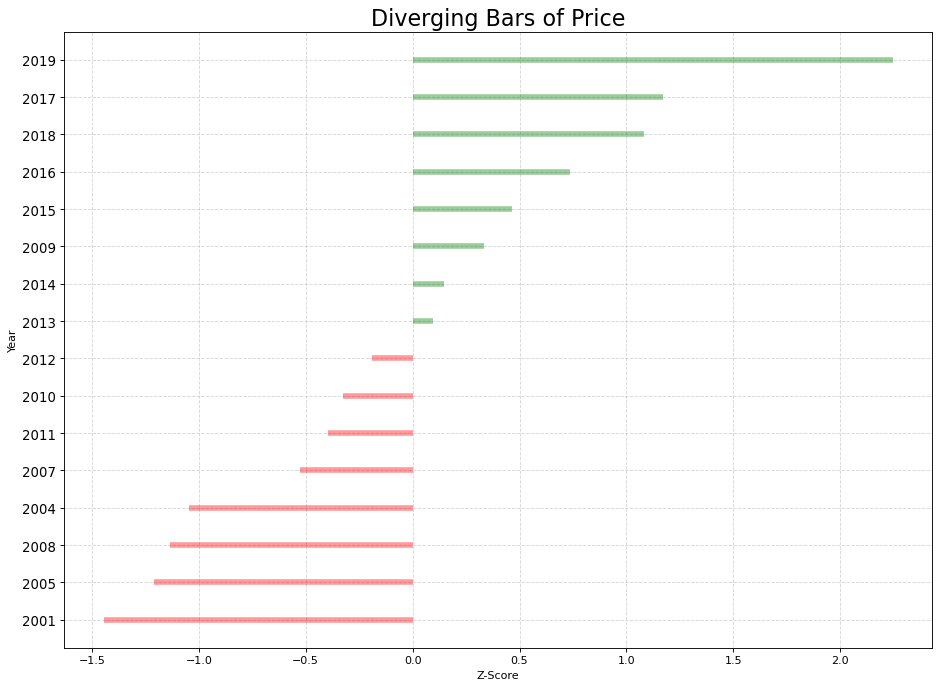

This result can be explained by the correlation between the car's age and the price. The older the car, the lower the price, Negative Correlation.


In [78]:
# Let's visualize the Price Mean through Years
mean_price_by_year = cars.groupby('Year')['Price'].mean()

# Creating a new dataframe with 'Year' and 'Price' columns
mean_price_df = mean_price_by_year.reset_index(name='Price')

# Assuming 'events' is your dataframe with 'year' and 'Fatalities' columns.
# Calculate the z-scores for 'Fatalities'
mean_price_df['Price_z'] = (mean_price_df['Price'] - mean_price_df['Price'].mean()) / mean_price_df['Price'].std()

# Assign colors based on the value of 'Fatalities_z'
mean_price_df['colors'] = ['red' if x < 0 else 'green' for x in mean_price_df['Price_z']]

# Sort the dataframe by 'Fatalities_z'
mean_price_df.sort_values('Price_z', inplace=True)

# Reset the index without creating a new 'level_0' column
mean_price_df.reset_index(drop=True, inplace=True)

# Draw the plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=mean_price_df.index, xmin=0, xmax=mean_price_df.Price_z, color=mean_price_df.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='Year', xlabel='Z-Score')
plt.yticks(mean_price_df.index, mean_price_df['Year'], fontsize=12)
plt.title('Diverging Bars of Price', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()
print("This result can be explained by the correlation between the car's age and the price. The older the car, the lower the price, Negative Correlation.")

# Multivariate Analysis Correlation between Numerical Features

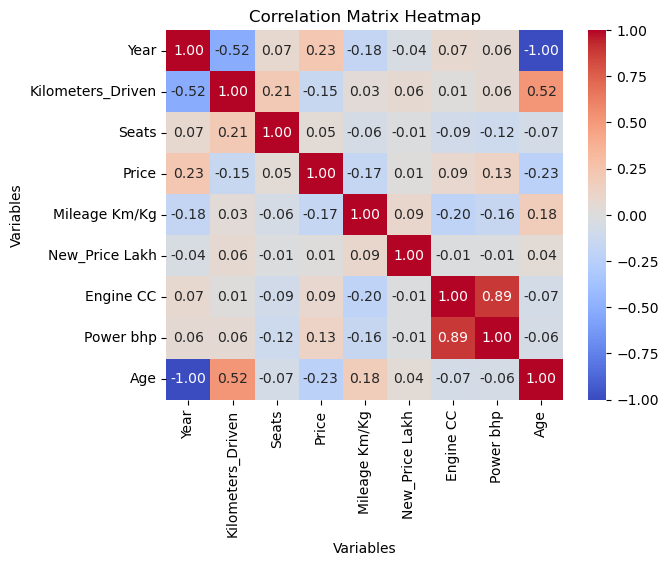

In [59]:
# Calculate the correlation matrix
matrix_corr = cars[num_cols].corr()

# Create a heatmap
sns.heatmap(matrix_corr, annot=True, fmt='.2f', cmap='coolwarm')

# Adding labels and title for clarity
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Display the heatmap
plt.show()

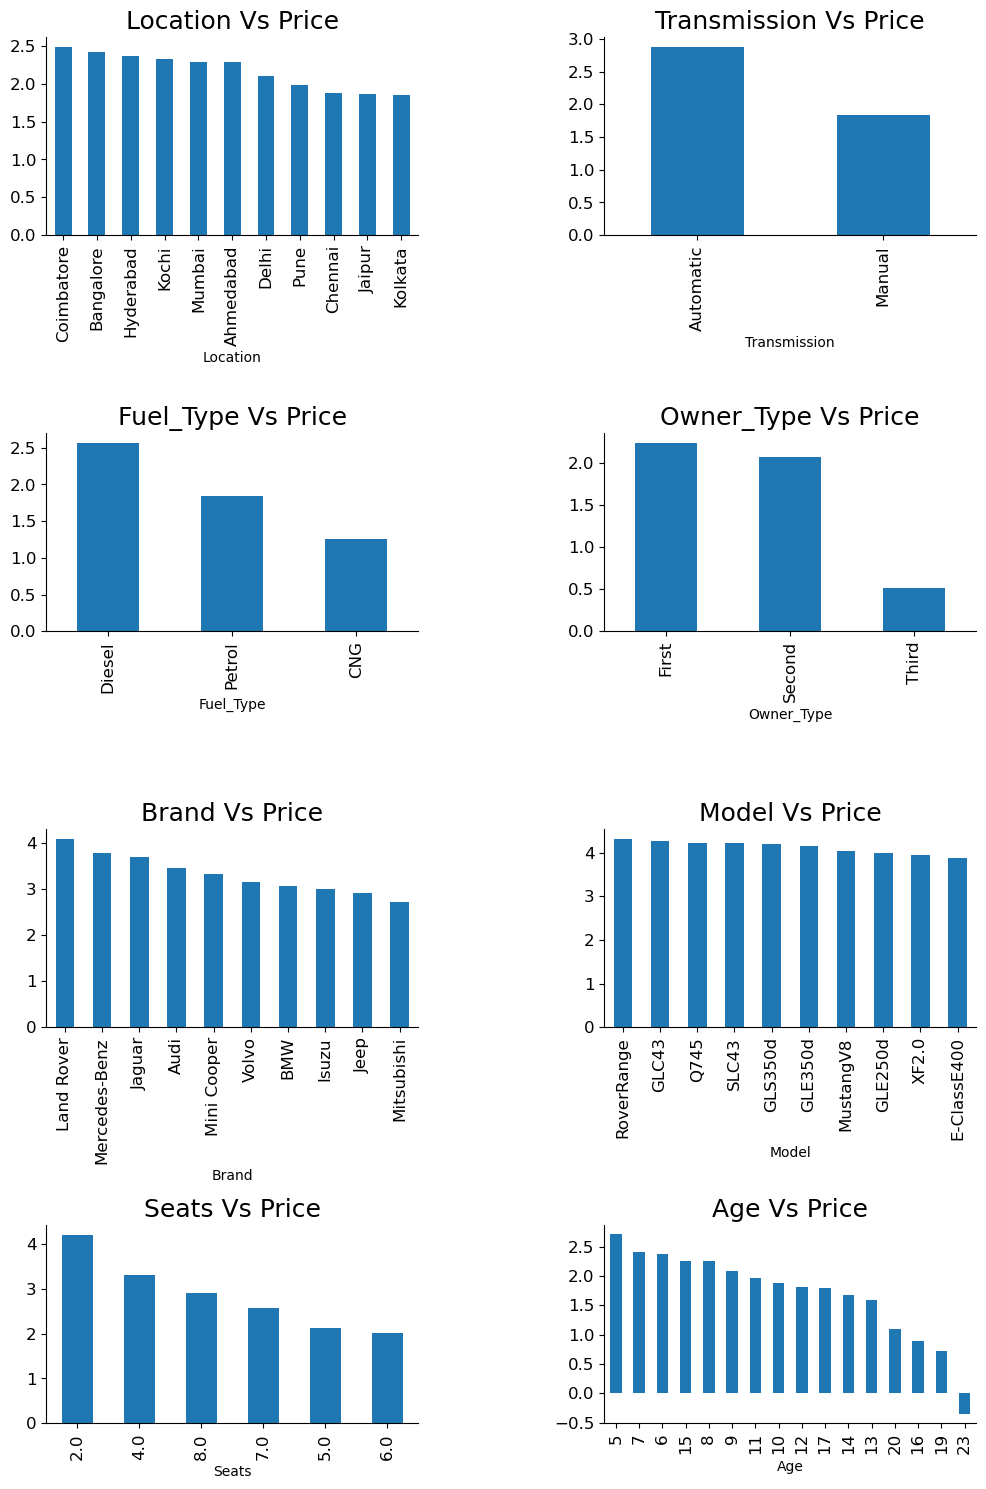

In [60]:
# For the Categorical Features
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
cars.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Price", fontsize=18)
cars.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
cars.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)
cars.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)
cars.groupby('Brand')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Brand Vs Price", fontsize=18)
cars.groupby('Model')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Model Vs Price", fontsize=18)
cars.groupby('Seats')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Seats Vs Price", fontsize=18)
cars.groupby('Age')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Age Vs Price", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

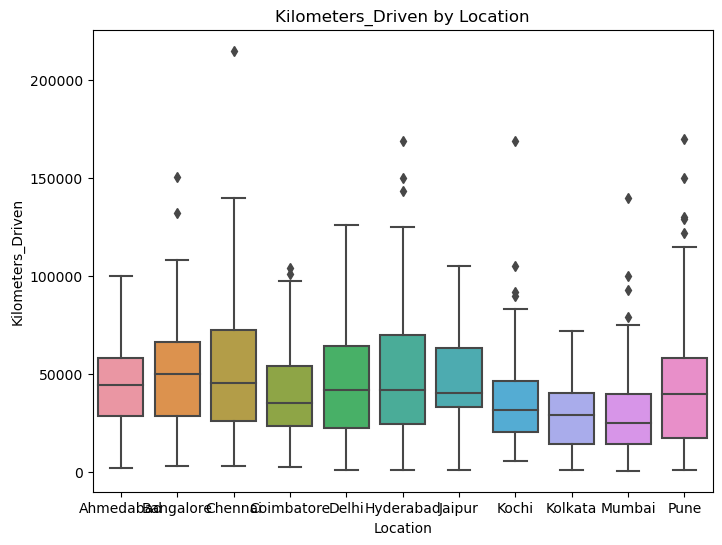

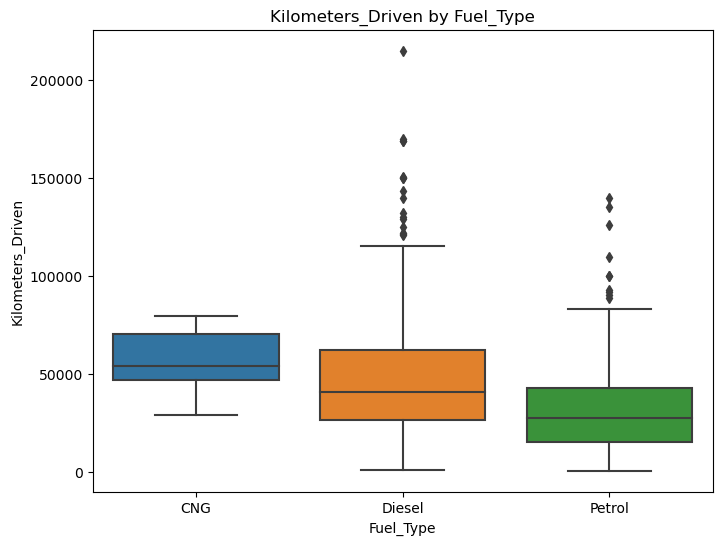

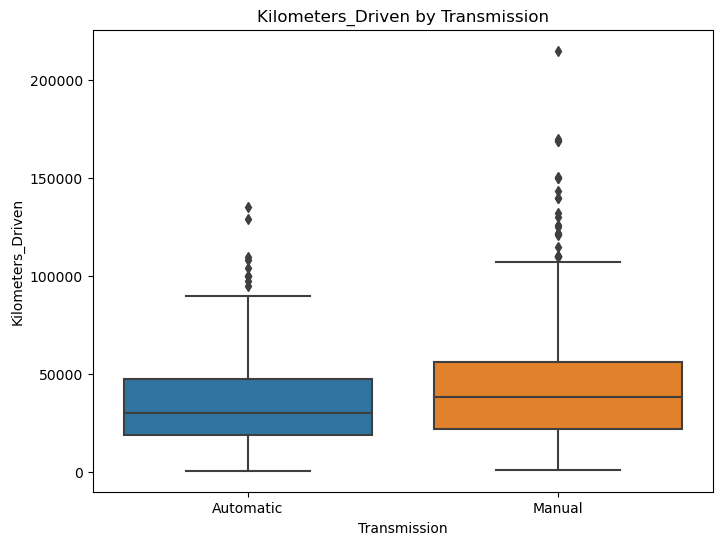

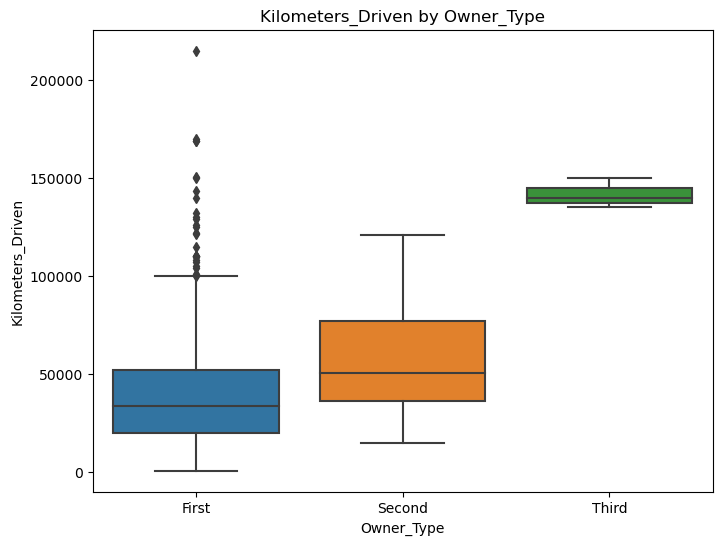

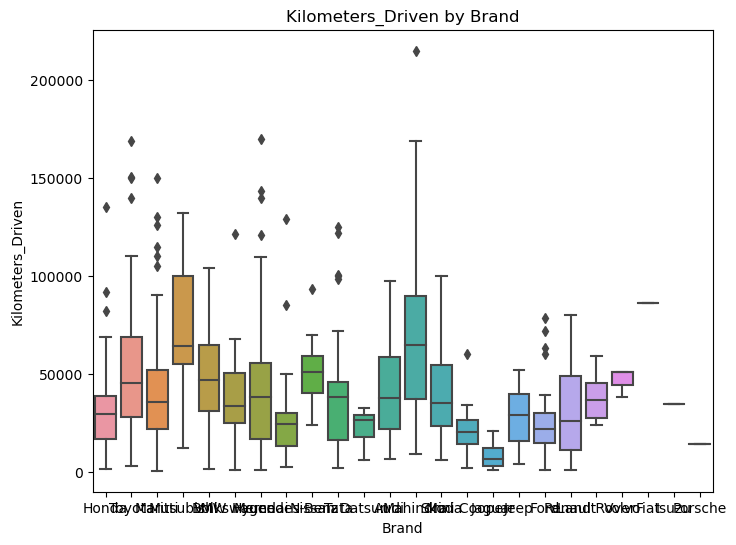

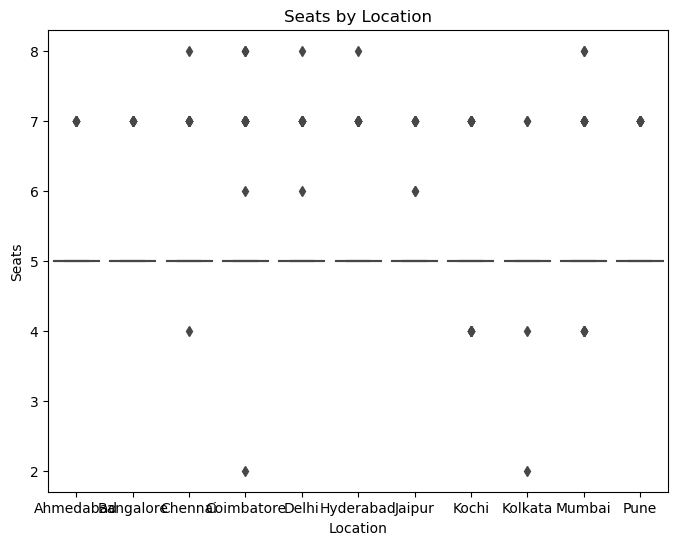

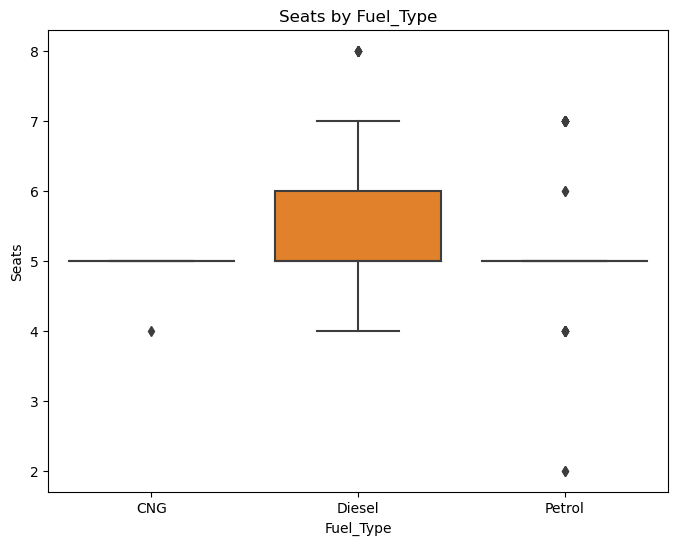

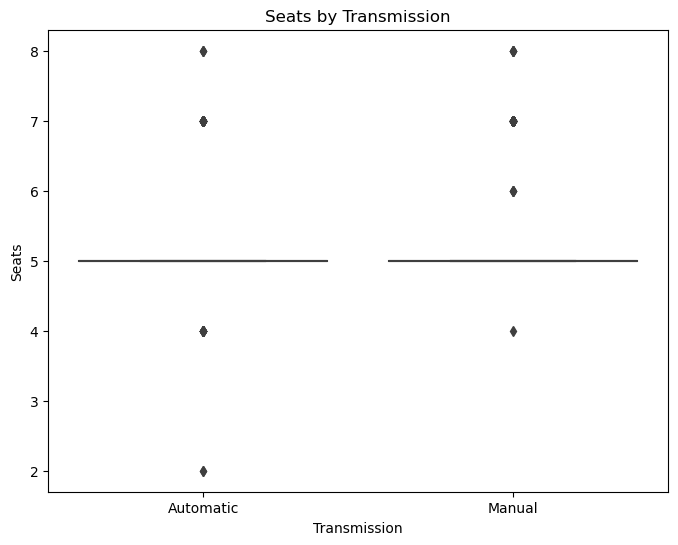

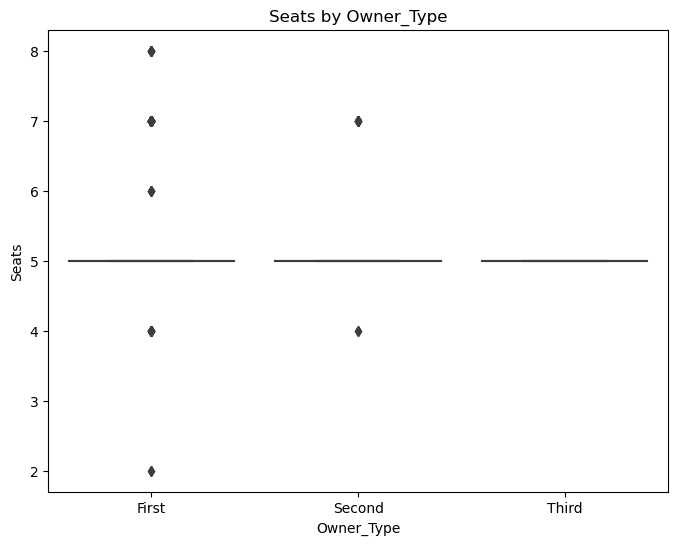

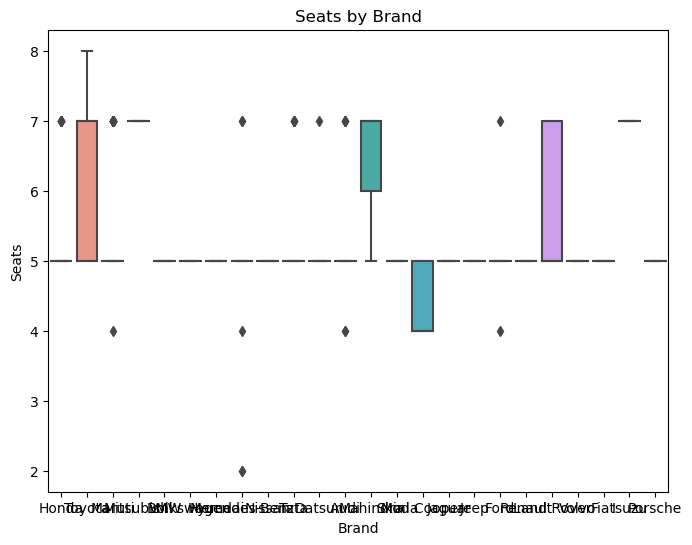

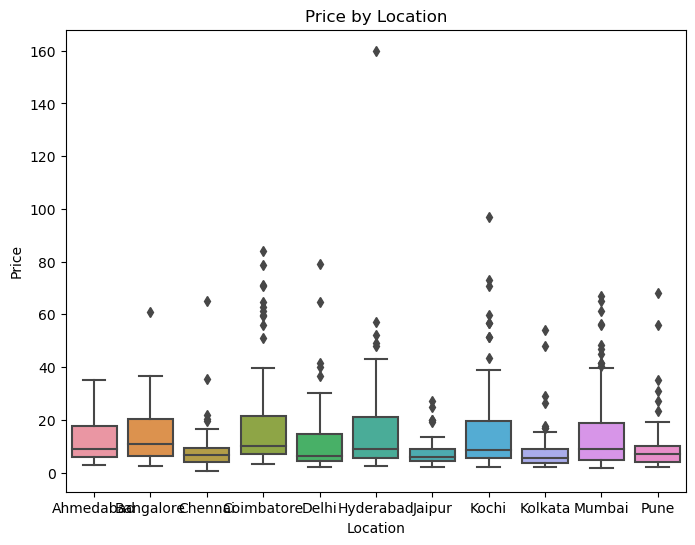

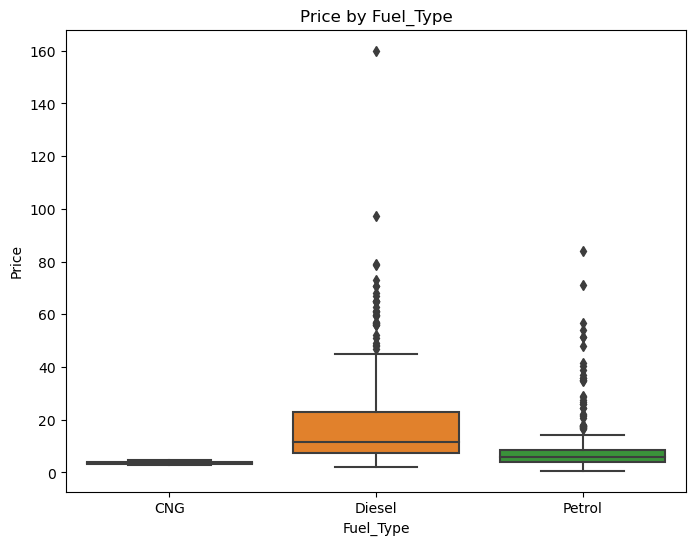

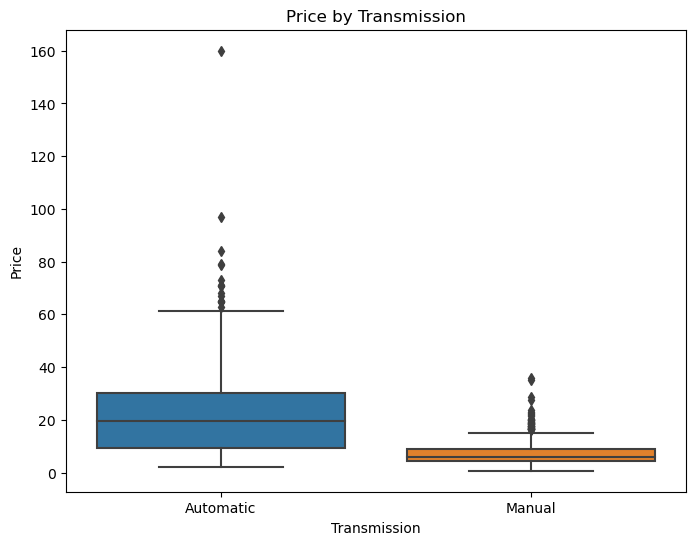

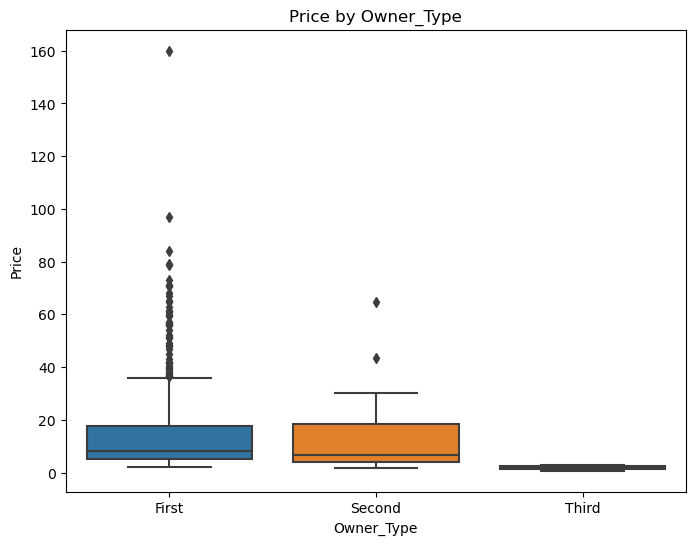

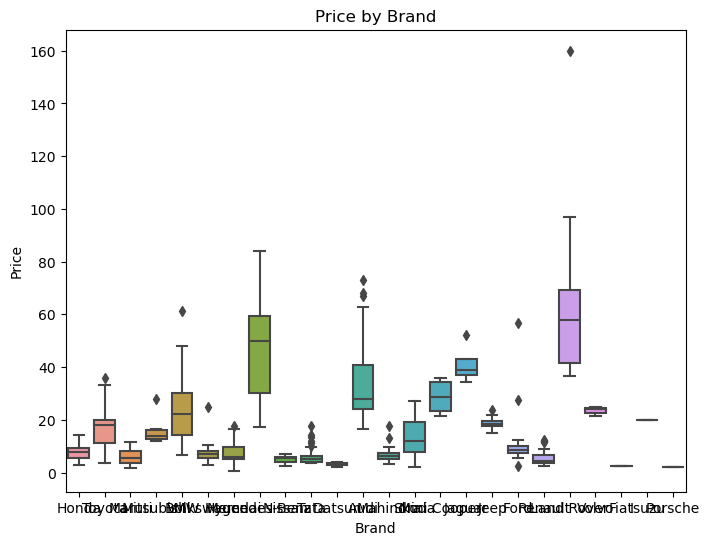

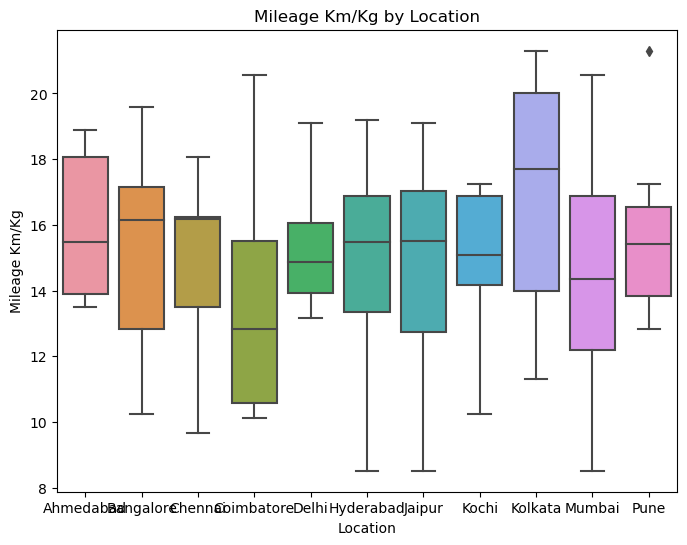

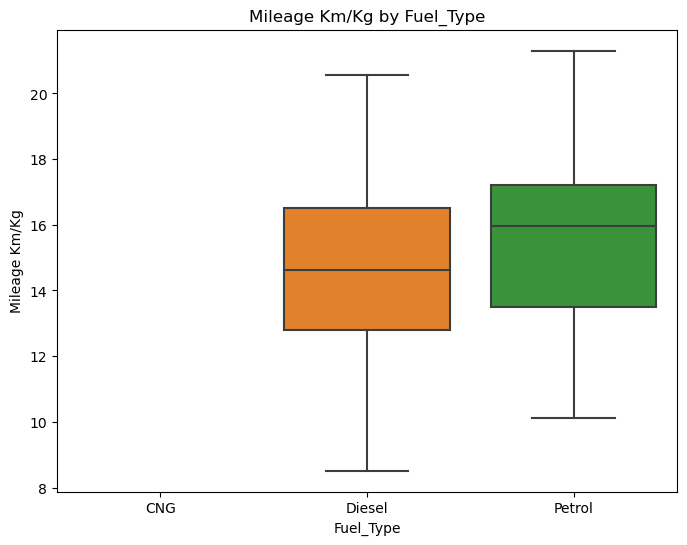

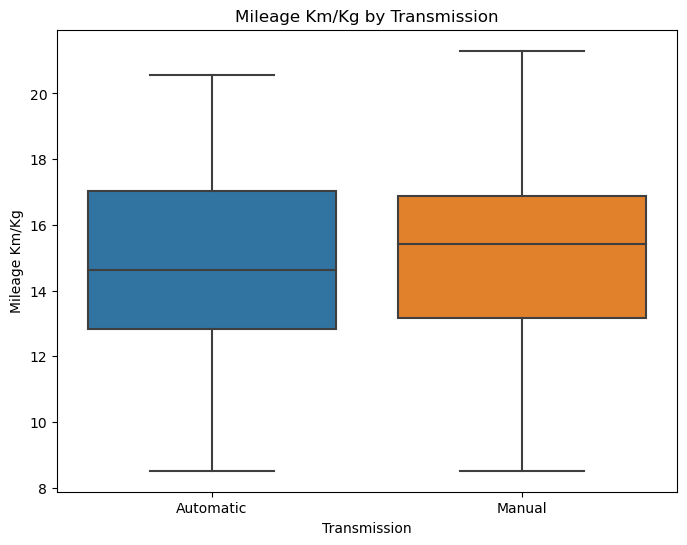

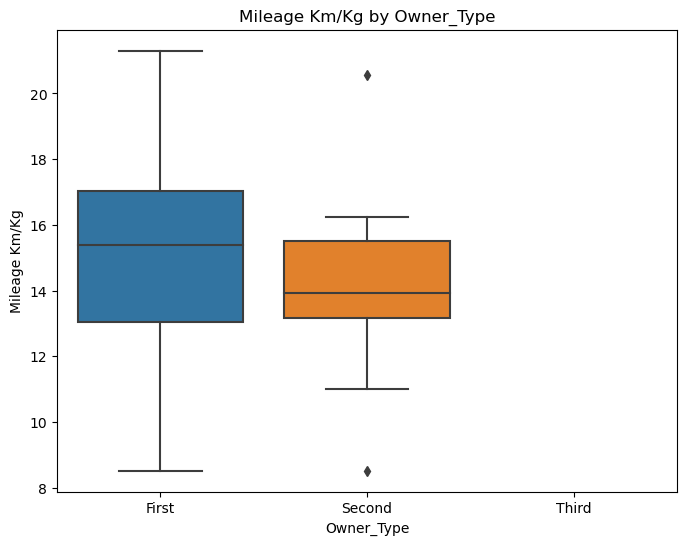

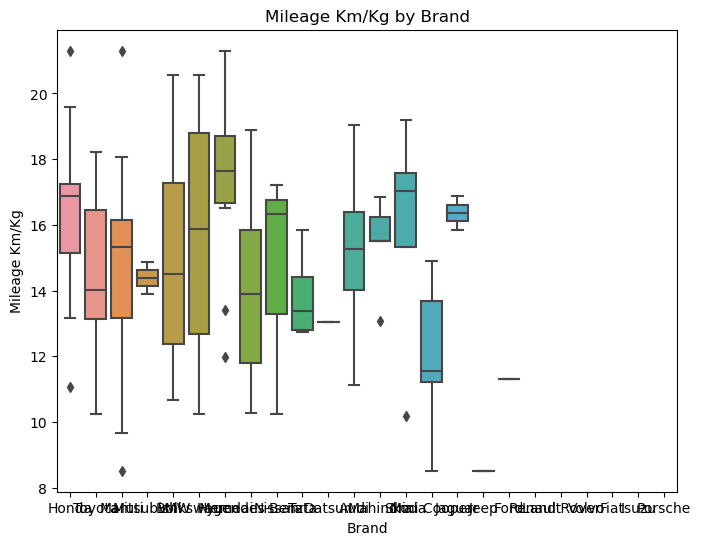

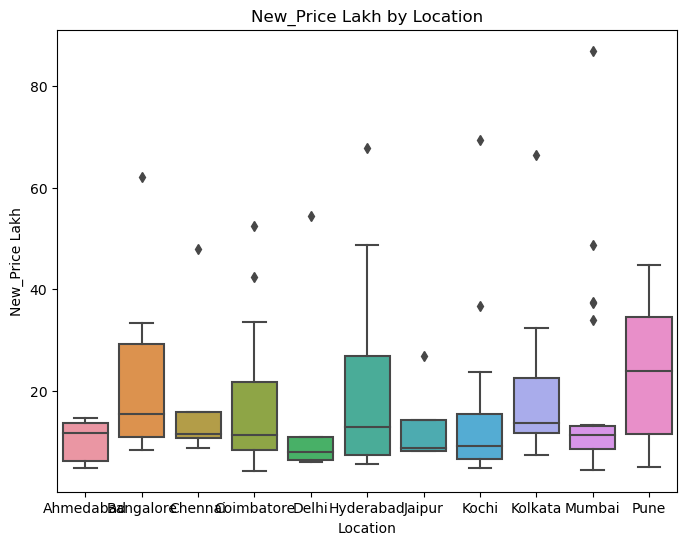

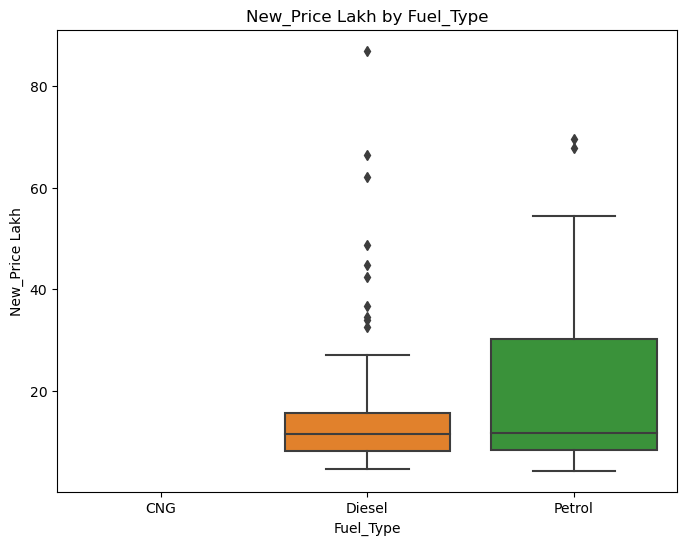

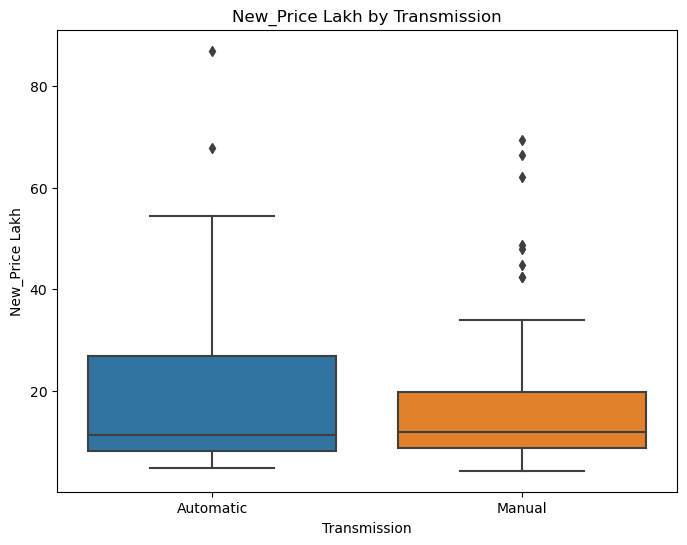

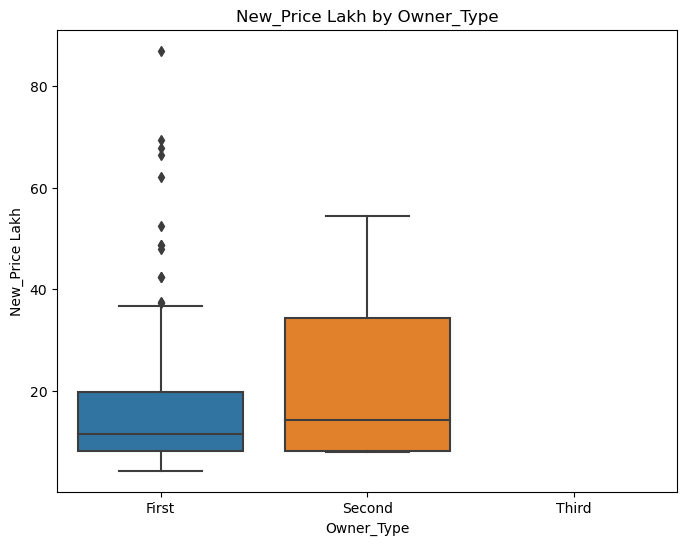

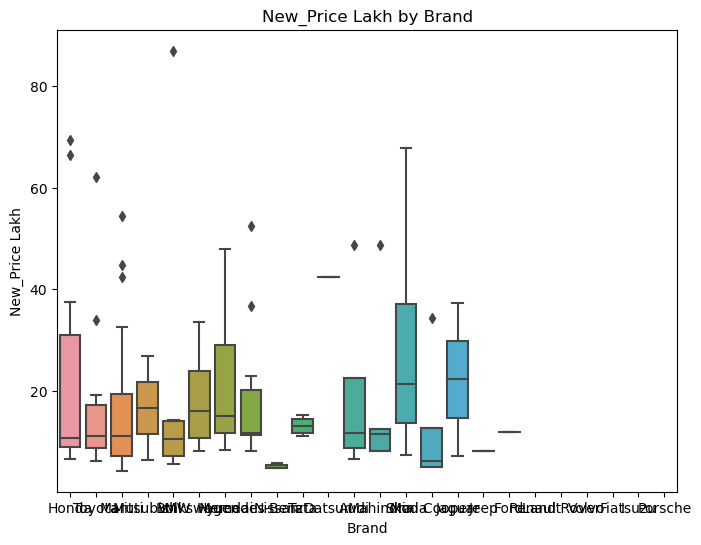

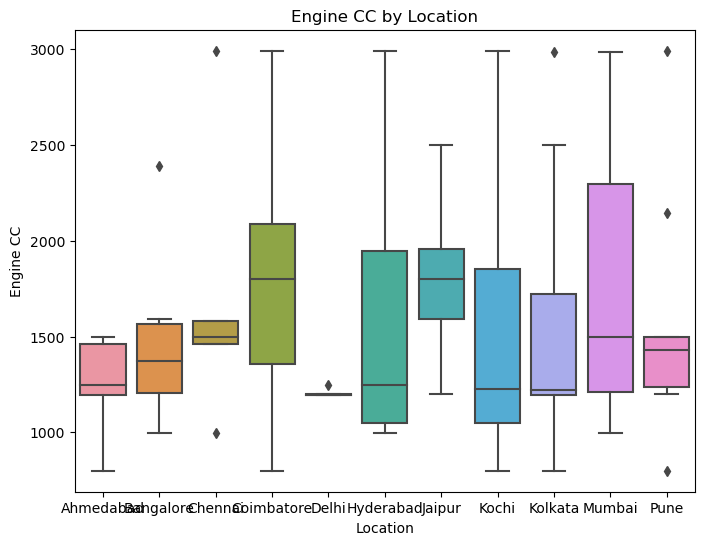

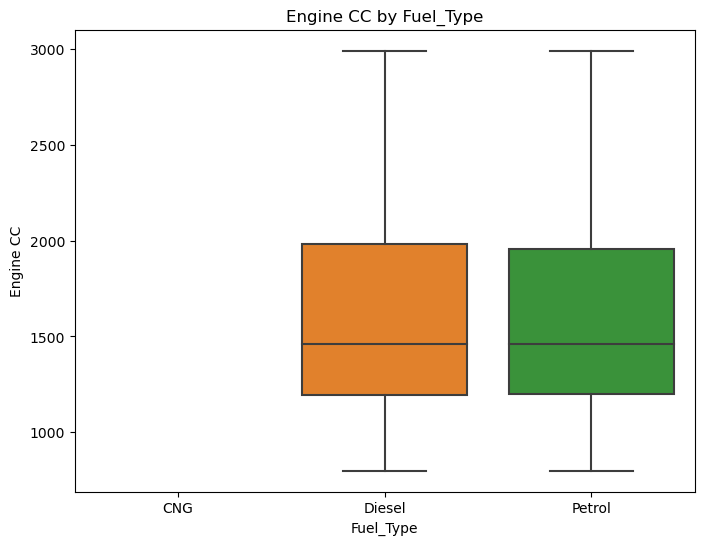

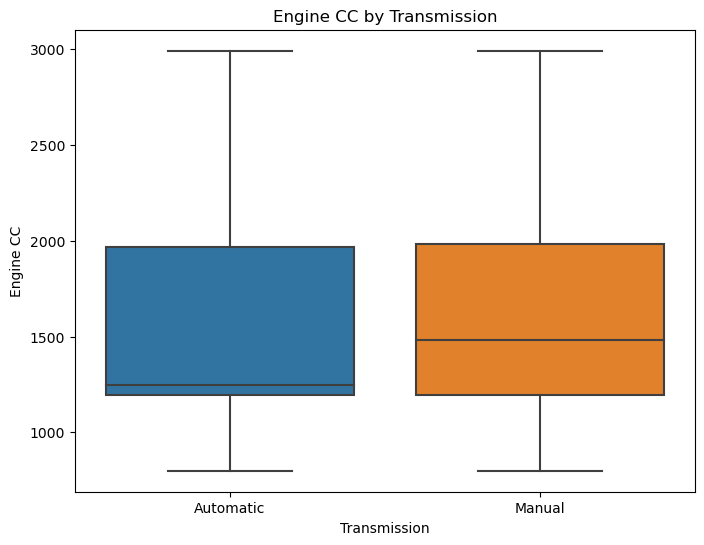

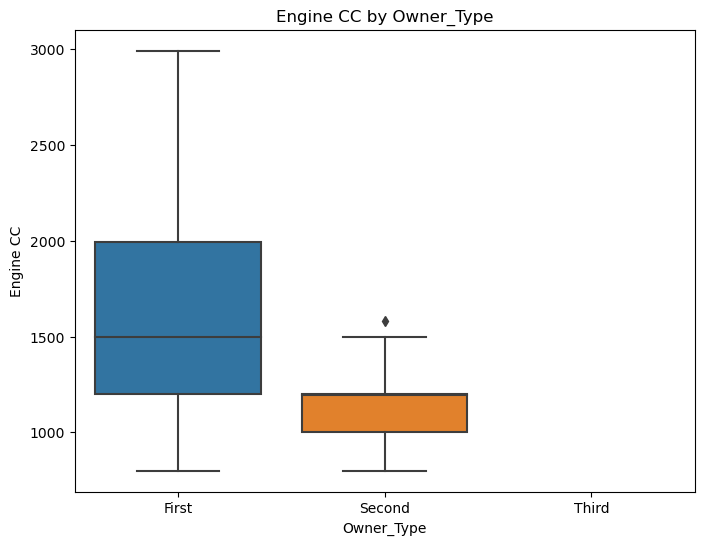

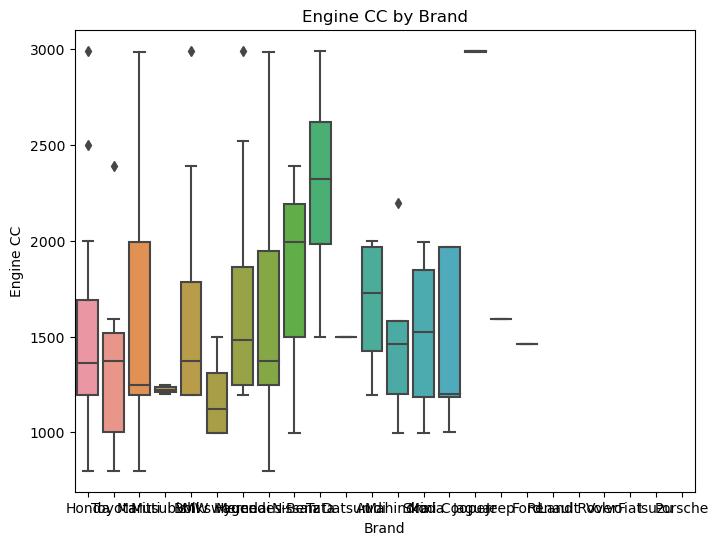

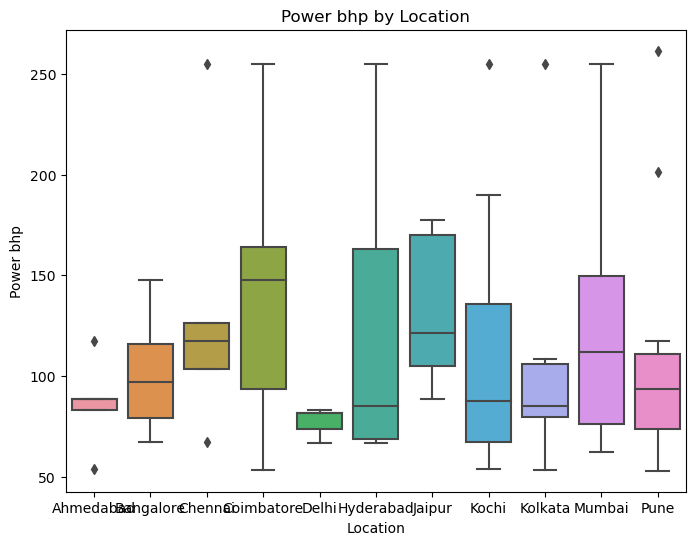

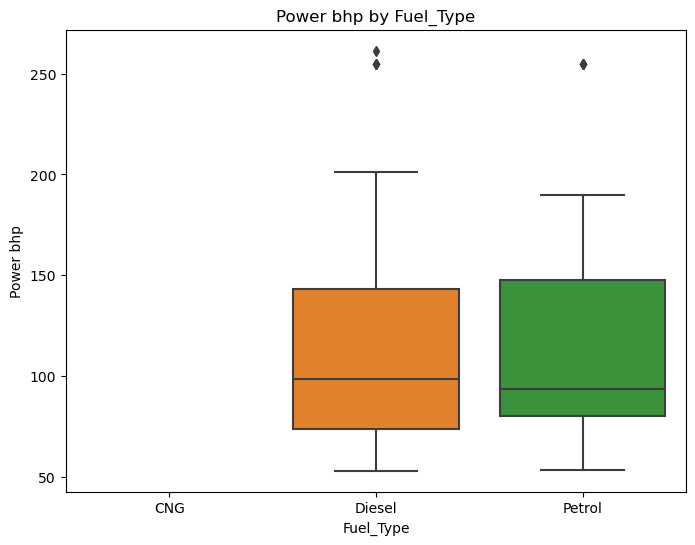

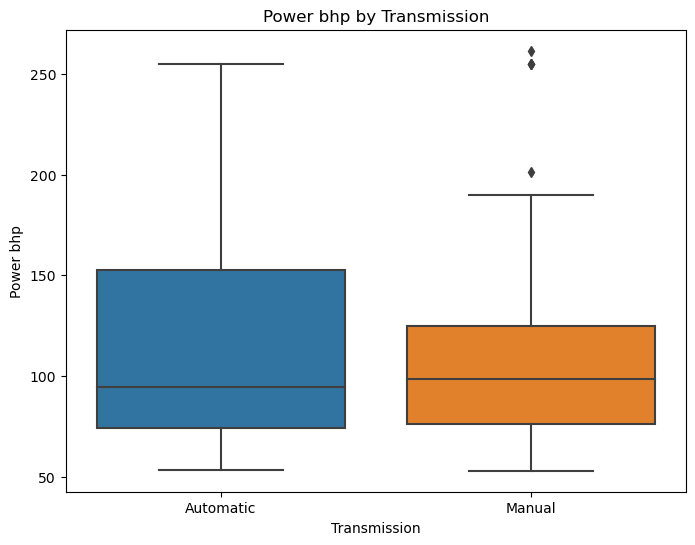

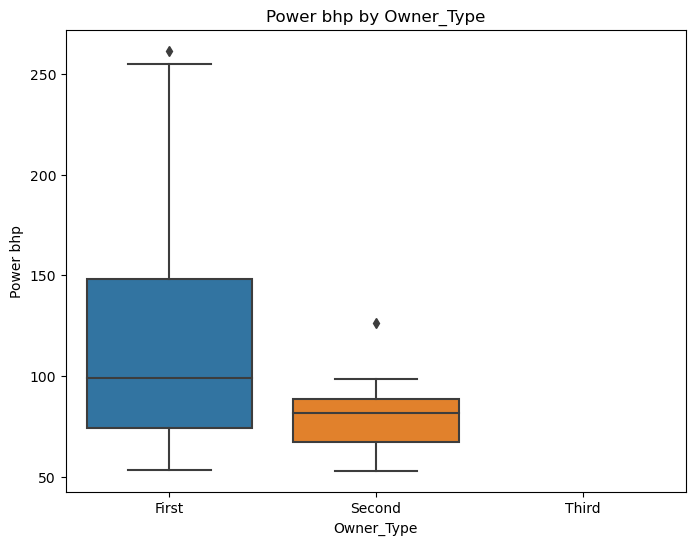

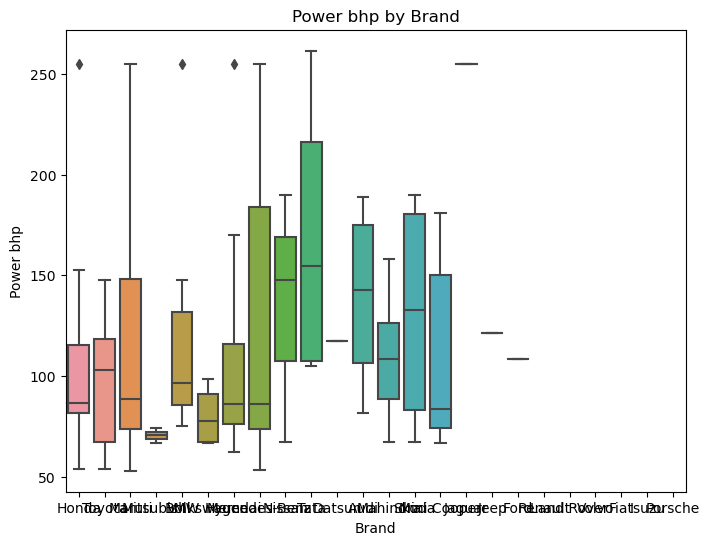

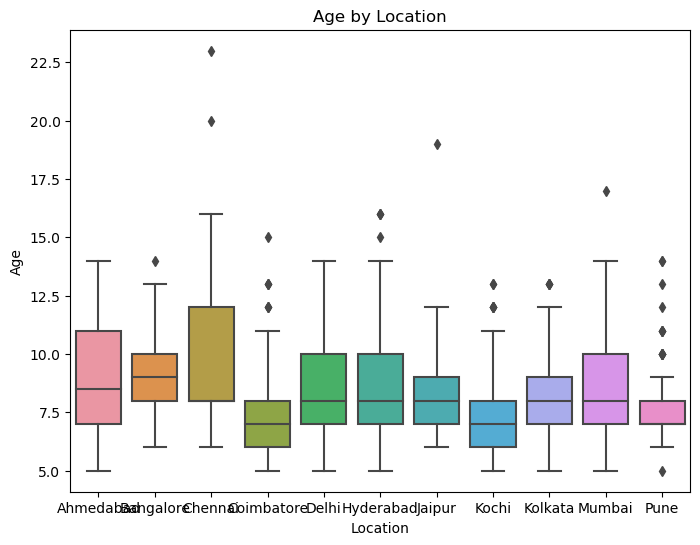

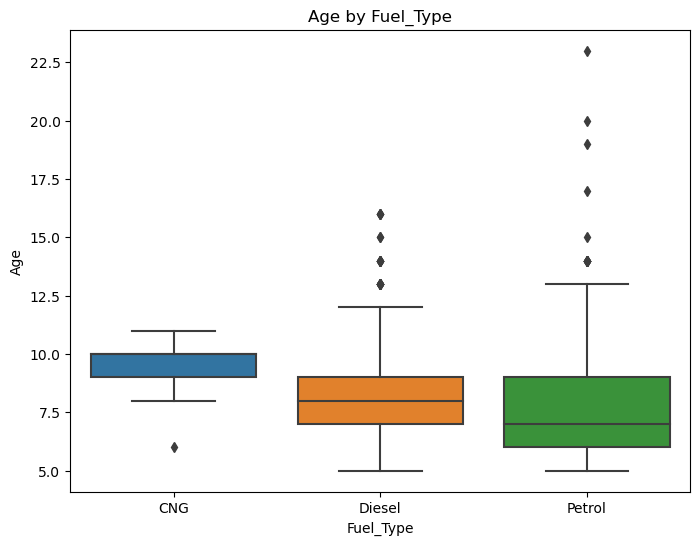

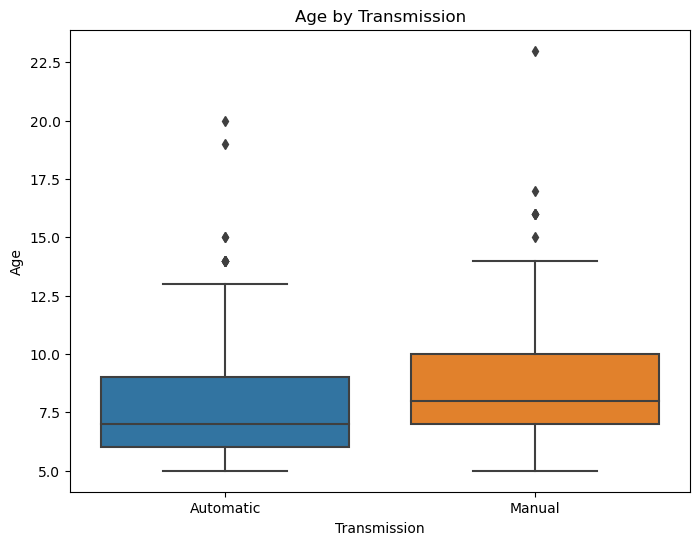

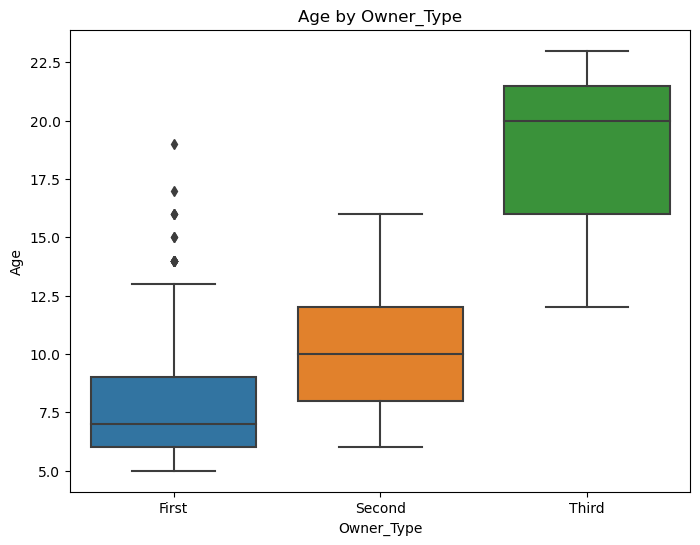

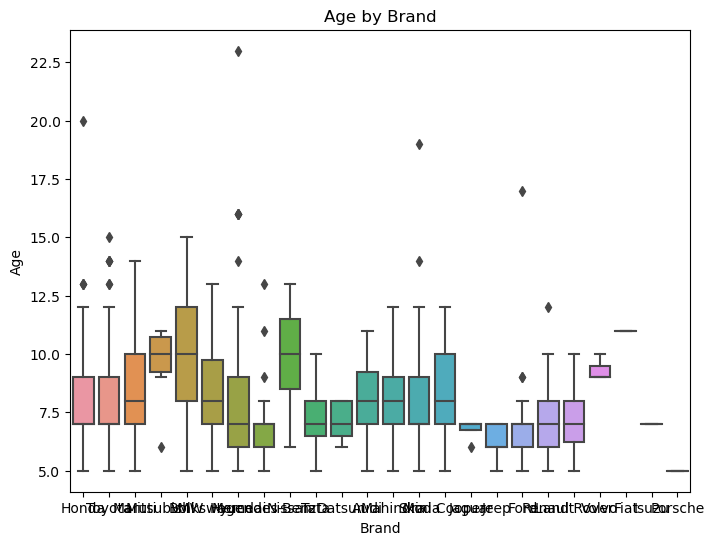

In [61]:
# Iterate through each combination of numerical and categorical columns
for num_col in num_cols:
    if num_col !='Year':
        for cat_col in cat_cols:
            if cat_col !='Name' and cat_col!='Model':
                # Create a new figure for each plot
                plt.figure(figsize=(8, 6))

                # Plot boxplot
                sns.boxplot(x=cat_col, y=num_col, data=cars)

                # Set title and labels
                plt.title(f'{num_col} by {cat_col}')
                plt.xlabel(cat_col)
                plt.ylabel(num_col)

                # Show plot
                plt.show()